Notebook for Demographic Dataframe Collection
This notebook combines all of the csv files into one dataframe.

# References

Colab Debug was used to modify "for column in demographic_columns_list" renaming loop.

Demographic csv file:
Pew Research Center. (2024, April 9). Changing partisan coalitions in a politically divided nation. Pew Research Center. Retrieved from https://www.pewresearch.org/politics/2024/04/09/changing-partisan-coalitions-in-a-politically-divided-nation/

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

In [3]:
# Upload the .csv file  "Aggregate_Data-Demographic.csv"
from google.colab import files
uploaded = files.upload()

Saving Aggregate-Data-Demographic.csv to Aggregate-Data-Demographic.csv


In [4]:
# Store the data in a Pandas DataFrame
# demographic_df = pd.read_csv(("Aggregate-Data-Demographic.csv"))
demographic_df = pd.read_csv(("Aggregate-Data-Demographic.csv"),
    index_col='Year',
    parse_dates=True
)
# Review DataFrame
demographic_df

Rep/Lean Rep  Dem/Lean Dem  Men Rep/Lean Rep  Men Dem/Lean Dem  \
Year                                                                         
1994-01-01            51            47                56                42   
1995-01-01            50            48                56                43   
1996-01-01            48            51                53                45   
1997-01-01            46            51                53                45   
1998-01-01            46            51                51                47   
1999-01-01            46            52                51                47   
2000-01-01            47            49                53                44   
2001-01-01            48            50                52                45   
2002-01-01            49            48                54                43   
2003-01-01            49            49                54                44   
2004-01-01            48            50                52                46   
2005-01-01            46            52                50                48   
2006-01-01            45            53                49                48   
2007-01-01            43            54                48                49   
2008-01-01            43            55                48                50   
2009-01-01            43            54                48                49   
2010-01-01            48            50                52                45   
2011-01-01            47            51                52                46   
2012-01-01            47            51                51                47   
2013-01-01            47            51                51                47   
2014-01-01            47            51                52                46   
2015-01-01            48            50                54                44   
2016-01-01            47            51                53                45   
2017-01-01            46            53                52                46   
2018-01-01            46            52                52                46   
2019-01-01            46            51                49                48   
2020-01-01            46            51                50                47   
2021-01-01            46            50                50                47   
2022-01-01            48            48                52                44   
2023-01-01            48            49                52                46   

            Women Rep/Lean Rep  Women Dem/Lean Dem  \
Year                                                 
1994-01-01                  46                  52   
1995-01-01                  46                  52   
1996-01-01                  43                  55   
1997-01-01                  41                  57   
1998-01-01                  42                  56   
1999-01-01                  42                  56   
2000-01-01                  42                  54   
2001-01-01                  44                  54   
2002-01-01                  45                  52   
2003-01-01                  44                  54   
2004-01-01                  43                  54   
2005-01-01                  42                  56   
2006-01-01                  41                  57   
2007-01-01                  38                  59   
2008-01-01                  38                  60   
2009-01-01                  39                  59   
2010-01-01                  44                  54   
2011-01-01                  43                  55   
2012-01-01                  44                  55   
2013-01-01                  43                  55   
2014-01-01                  42                  55   
2015-01-01                  43                  55   
2016-01-01                  41                  57   
2017-01-01                  40                  59   
2018-01-01                  41                  58   
2019-01-01                  43                  54   
202

In [6]:
# List Available Column Titles
demographic_columns_list=demographic_df.columns.tolist()
display(demographic_columns_list)

['Rep/Lean Rep',
 'Dem/Lean Dem',
 'Men Rep/Lean Rep',
 'Men Dem/Lean Dem',
 'Women Rep/Lean Rep',
 'Women Dem/Lean Dem',
 'White, non-Hispanic Rep/Lean Rep',
 'White, non-Hispanic Dem/Lean Dem',
 'Hispanic Rep/Lean Rep',
 'Hispanic Dem/Lean Dem',
 'Black, non-Hispanic Rep/Lean Rep',
 'Black, non-Hispanic Dem/Lean Dem',
 'Asian, non-Hispanic Rep/Lean Rep',
 'Asian, non-Hispanic Dem/Lean Dem',
 'Urban Rep/Lean Rep',
 'Urban Dem/Lean Dem',
 "Suburban 'Rep/Lean Rep",
 'Suburban Dem/Lean Dem',
 'Rural Rep/Lean Rep',
 'Rural Dem/Lean Dem',
 'Born in 1940s Rep/Lean Rep',
 'Born in 1940s Dem/Lean Dem',
 'Born in 1950s Rep/Lean Rep',
 'Born in 1950s Dem/Lean Dem',
 'Born in 1960s Rep/Lean Rep',
 'Born in 1960s Dem/Lean Dem',
 'Born in 1970s Rep/Lean Rep',
 'Born in 1970s Dem/Lean Dem',
 'Born in 1980s Rep/Lean Rep',
 'Born in 1980s Dem/Lean Dem',
 'Born in 1990s Rep/Lean Rep',
 'Born in 1990s Dem/Lean Dem',
 'All Protestants Rep/Lean Rep',
 'All Protestants Dem/Lean Dem',
 'White evangelical P

In [7]:
# Rename the columns, referencing that Rep/Lean Rep and Dem/Lean Dem are equivalent to "Republican/Leaning Republican" etc.
for column in demographic_columns_list:
    index = demographic_columns_list.index(column)
    demographic_df.rename(columns={column: column.replace("/Lean Rep", "").replace("/Lean Dem", "")}, inplace=True)
# List Modified Column Titles
demographic_columns_list=demographic_df.columns.tolist()
display(demographic_columns_list)
print("Note -- Republican and Democrat includes identify as Republican or Democratic as well as 'Leans Republican' or 'Leans Democrat' ")
# Reference:  Colab Debug for index and replace arguments

['Rep',
 'Dem',
 'Men Rep',
 'Men Dem',
 'Women Rep',
 'Women Dem',
 'White, non-Hispanic Rep',
 'White, non-Hispanic Dem',
 'Hispanic Rep',
 'Hispanic Dem',
 'Black, non-Hispanic Rep',
 'Black, non-Hispanic Dem',
 'Asian, non-Hispanic Rep',
 'Asian, non-Hispanic Dem',
 'Urban Rep',
 'Urban Dem',
 "Suburban 'Rep",
 'Suburban Dem',
 'Rural Rep',
 'Rural Dem',
 'Born in 1940s Rep',
 'Born in 1940s Dem',
 'Born in 1950s Rep',
 'Born in 1950s Dem',
 'Born in 1960s Rep',
 'Born in 1960s Dem',
 'Born in 1970s Rep',
 'Born in 1970s Dem',
 'Born in 1980s Rep',
 'Born in 1980s Dem',
 'Born in 1990s Rep',
 'Born in 1990s Dem',
 'All Protestants Rep',
 'All Protestants Dem',
 'White evangelical Protestant Rep',
 'White evangelical Protestant Dem',
 'White nonevangelical Protestant Rep',
 'White nonevangelical Protestant Dem',
 'Black Protestant Rep',
 'Black Protestant Dem',
 'Hispanic Protestant* Rep',
 'Hispanic Protestant* Dem',
 'All catholics Rep',
 'All catholics Dem',
 'White Catholic Rep'

Note -- Republican and Democrat includes identify as Republican or Democratic as well as 'Leans Republican' or 'Leans Democrat' 


In [8]:
# Review the data types of the DataFrame using the info function
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1994-01-01 to 2023-01-01
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rep                                  30 non-null     int64  
 1   Dem                                  30 non-null     int64  
 2   Men Rep                              30 non-null     int64  
 3   Men Dem                              30 non-null     int64  
 4   Women Rep                            30 non-null     int64  
 5   Women Dem                            30 non-null     int64  
 6   White, non-Hispanic Rep              30 non-null     int64  
 7   White, non-Hispanic Dem              30 non-null     int64  
 8   Hispanic Rep                         18 non-null     float64
 9   Hispanic Dem                         18 non-null     float64
 10  Black, non-Hispanic Rep              30 non-null     int64  
 11  Black, non-His

# Demographic Analysis:  Groups Republican/Leaning Republican and Democrat/Leaning Democrat
## Compare these values to the Pew Research data to overall voter election results.
Compare the predicted results using demographic data to the overall election results predicted from final vote counts 2000 to 2020.

## Poll Results:  Republican and Leaning Republican (1994 to 2023)

In [9]:
# Republican Demographic Dataframe
republican = demographic_df.loc["1994-01-01":"2023-01-01"][["Rep"]]
display(republican.head())
republican.tail()

Rep
Year           
1994-01-01   51
1995-01-01   50
1996-01-01   48
1997-01-01   46
1998-01-01   46

Rep
Year           
2019-01-01   46
2020-01-01   46
2021-01-01   46
2022-01-01   48
2023-01-01   48

<Axes: title={'center': 'Republicans'}, xlabel='Year'>

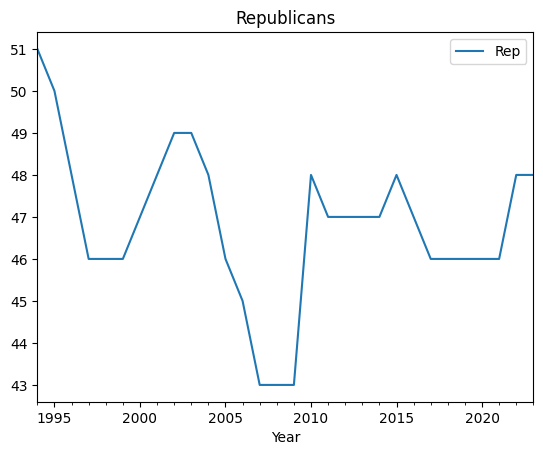

In [10]:
# Plot demographic
republican.plot(title="Republicans")

Start Prophet Model for Demographic:  Republican

In [11]:
# Generate Prophet Model for Next Year
# Using the demographic DataFrame, reset the index so the date information is no longer the index
republican_prophet_df = republican.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
republican_prophet_df.columns = ['ds', 'y']
# Drop an NaN values from the prophet_df DataFrame
republican_prophet_df = republican_prophet_df.dropna()
# View the DataFrame
display(republican_prophet_df.tail())


ds   y
25 2019-01-01  46
26 2020-01-01  46
27 2021-01-01  46
28 2022-01-01  48
29 2023-01-01  48

In [12]:
# Call the Prophet function, store as an object
model_republican = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_republican.fit(republican_prophet_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/2w62z6ez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/cudchnmn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4935', 'data', 'file=/tmp/tmpmebgaej8/2w62z6ez.json', 'init=/tmp/tmpmebgaej8/cudchnmn.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelaxl1tal4/prophet_model-20240531005649.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:56:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:56:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [13]:
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_republican_trends = model_republican.make_future_dataframe(periods=1, freq="A")

# View the last five rows of the future DataFrame
display(future_republican_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

In [14]:
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_republican_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_republican_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

In [15]:
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_republican_trends=model_republican.predict(future_republican_trends)

# Display the last five rows of the forecast_*_trends DataFrame
forecast_republican_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  46.710293   44.477692   48.660523    46.710293    46.710293   
27 2021-01-01  46.772589   44.754285   48.680292    46.772589    46.772589   
28 2022-01-01  46.834715   44.869298   48.976595    46.834715    46.834715   
29 2023-01-01  46.896841   44.976827   48.810501    46.896841    46.896841   
30 2024-01-01  46.958967   45.145801   48.999326    46.952155    46.966043   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  46.710293  
27                         0.0  46.772589  
28                         0.0  46.834715  
29                         0.0  46.896841  
30                         0.0  46.958967

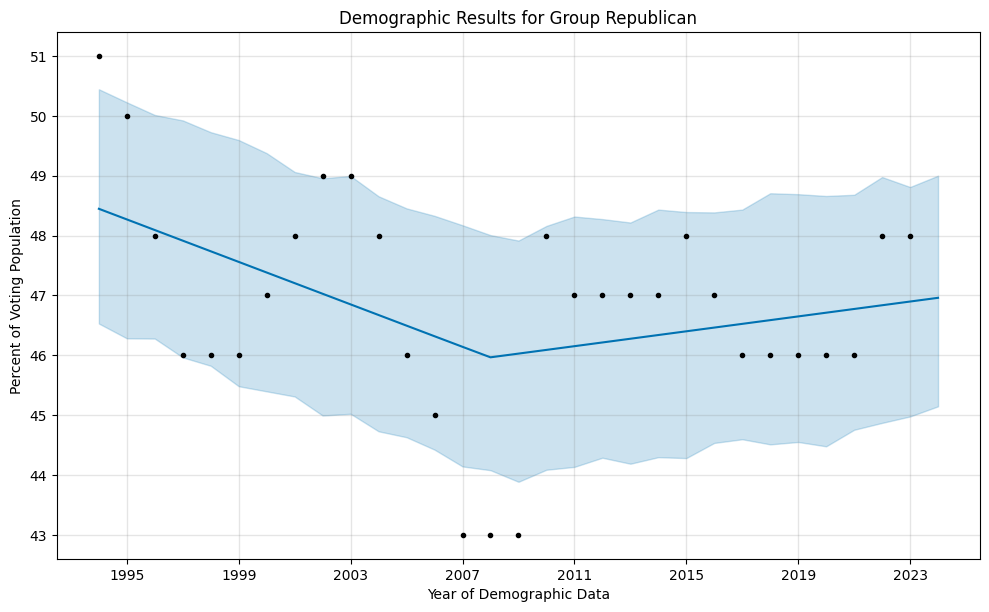

In [16]:
# Plot the Prophet predictions for the trends data
# model_republican.plot(forecast_republican_trends)
from matplotlib import pyplot as plt
fig = model_republican.plot(forecast_republican_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Republican')
plt.show()

In [17]:
# Show forecast_republican_trends
forecast_republican_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  46.710293   44.477692   48.660523    46.710293    46.710293   
27 2021-01-01  46.772589   44.754285   48.680292    46.772589    46.772589   
28 2022-01-01  46.834715   44.869298   48.976595    46.834715    46.834715   
29 2023-01-01  46.896841   44.976827   48.810501    46.896841    46.896841   
30 2024-01-01  46.958967   45.145801   48.999326    46.952155    46.966043   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  46.710293  
27                         0.0  46.772589  
28                         0.0  46.834715  
29                         0.0  46.896841  
30                         0.0  46.958967

In [18]:
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_republican_trends = forecast_republican_trends.set_index('ds')
forecast_republican_trends.tail()

trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                        
2020-01-01  46.710293   44.477692   48.660523    46.710293    46.710293   
2021-01-01  46.772589   44.754285   48.680292    46.772589    46.772589   
2022-01-01  46.834715   44.869298   48.976595    46.834715    46.834715   
2023-01-01  46.896841   44.976827   48.810501    46.896841    46.896841   
2024-01-01  46.958967   45.145801   48.999326    46.952155    46.966043   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2020-01-01             0.0                   0.0                   0.0   
2021-01-01             0.0                   0.0                   0.0   
2022-01-01             0.0                   0.0                   0.0   
2023-01-01             0.0                   0.0                   0.0   
2024-01-01             0.0                   0.0                   0.0   

            multiplicative_terms  multiplicative_terms_lower  \
ds                                                             
2020-01-01                   0.0                         0.0   
2021-01-01                   0.0                         0.0   
2022-01-01                   0.0                         0.0   
2023-01-01                   0.0                         0.0   
2024-01-01                   0.0                         0.0   

            multiplicative_terms_upper       yhat  
ds                                                 
2020-01-01                         0.0  46.710293  
2021-01-01                         0.0  46.772589  
2022-01-01                         0.0  46.834715  
2023-01-01                         0.0  46.896841  
2024-01-01                         0.0  46.958967

In [19]:
#Rename yhat yhat_lower yhat_ upper
forecast_republican_trends = forecast_republican_trends.rename(
    columns={
        "yhat_upper": "Rep Best",
        "yhat_lower": "Rep Worst",
        "yhat": "Rep Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_republican_trends_y_only = forecast_republican_trends[['Rep Most Likely','Rep Best','Rep Worst']]
forecast_republican_trends_y_only.head()

Rep Most Likely   Rep Best  Rep Worst
ds                                               
1994-01-01        48.446277  50.443542  46.528963
1995-01-01        48.268921  50.225035  46.281971
1996-01-01        48.091566  50.013790  46.278018
1997-01-01        47.913724  49.922785  45.963213
1998-01-01        47.736368  49.726131  45.823308

In [21]:
# Round columns rep most likely, rep best, and rep worst to one digit (Reference: AI assist debug)
forecast_republican_trends_y_only = forecast_republican_trends_y_only.round(decimals=1)
forecast_republican_trends_y_only.head()


Rep Most Likely  Rep Best  Rep Worst
ds                                              
1994-01-01             48.4      50.4       46.5
1995-01-01             48.3      50.2       46.3
1996-01-01             48.1      50.0       46.3
1997-01-01             47.9      49.9       46.0
1998-01-01             47.7      49.7       45.8

<Axes: title={'center': 'Model: Republicans 1994 to 2024'}, xlabel='ds'>

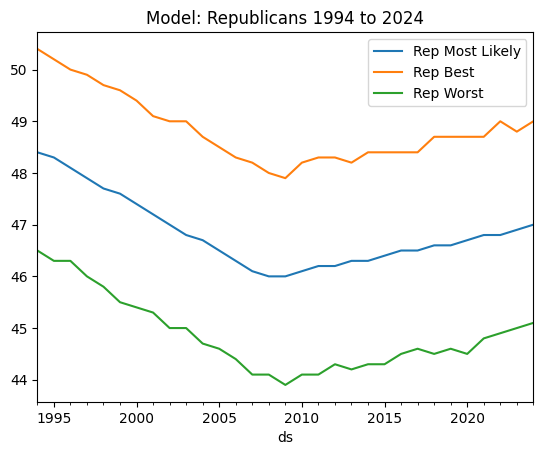

In [22]:
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_republican_trends_y_only[['Rep Most Likely','Rep Best','Rep Worst']].plot(title='Model: Republicans 1994 to 2024')

## Poll Results:  Democrat and Leaning Democrat (1994 to 2023)

In [23]:
# Democrat Demographic
democrat = demographic_df.loc["1994-01-01":"2023-01-01"][["Dem"]]
display(democrat.head())
democrat.tail()

Dem
Year           
1994-01-01   47
1995-01-01   48
1996-01-01   51
1997-01-01   51
1998-01-01   51

Dem
Year           
2019-01-01   51
2020-01-01   51
2021-01-01   50
2022-01-01   48
2023-01-01   49

<Axes: title={'center': 'Democrats'}, xlabel='Year'>

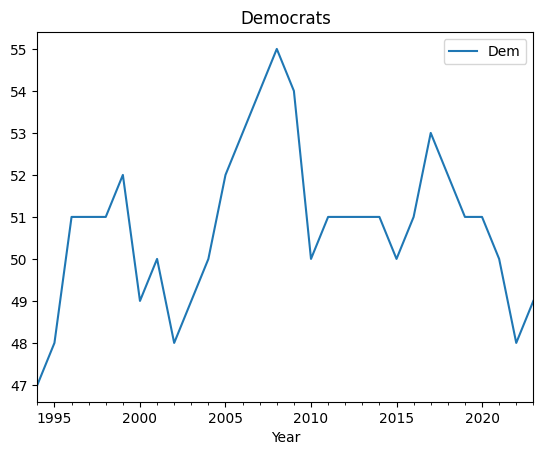

In [24]:
# Plot demographic
democrat.plot(title="Democrats")

### Start Prophet Model for Demographic:  Democrat

In [25]:
# Generate Prophet Model for Next Year
# Using the demographic DataFrame, reset the index so the date information is no longer the index
democrat_prophet_df = democrat.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
democrat_prophet_df.columns = ['ds', 'y']
# Drop an NaN values from the prophet_df DataFrame
democrat_prophet_df = democrat_prophet_df.dropna()
# View the DataFrame
display(democrat_prophet_df.tail())

ds   y
25 2019-01-01  51
26 2020-01-01  51
27 2021-01-01  50
28 2022-01-01  48
29 2023-01-01  49

In [26]:
# Call the Prophet function, store as an object
model_democrat = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_democrat.fit(democrat_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/sfyml8sh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/yjp6fuce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95561', 'data', 'file=/tmp/tmpmebgaej8/sfyml8sh.json', 'init=/tmp/tmpmebgaej8/yjp6fuce.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_model_bdrvx0j/prophet_model-20240531005654.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:56:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:56:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [27]:
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_democrat_trends = model_democrat.make_future_dataframe(periods=1, freq="A")

# View the last five rows of the future DataFrame
display(future_democrat_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

In [28]:
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_democrat_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
future_democrat_trends.tail()

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

In [29]:
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_democrat_trends=model_democrat.predict(future_democrat_trends)
# Display the last five rows of the forecast_*_trends DataFrame
forecast_democrat_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  50.484200   48.562591   52.450806    50.484200    50.484200   
27 2021-01-01  50.361910   48.315416   52.382353    50.361910    50.361910   
28 2022-01-01  50.239953   48.477759   52.229604    50.239953    50.239953   
29 2023-01-01  50.117997   48.247685   51.994567    50.117997    50.117997   
30 2024-01-01  49.996040   48.015890   51.991180    49.986288    50.005864   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  50.484200  
27                         0.0  50.361910  
28                         0.0  50.239953  
29                         0.0  50.117997  
30                         0.0  49.996040

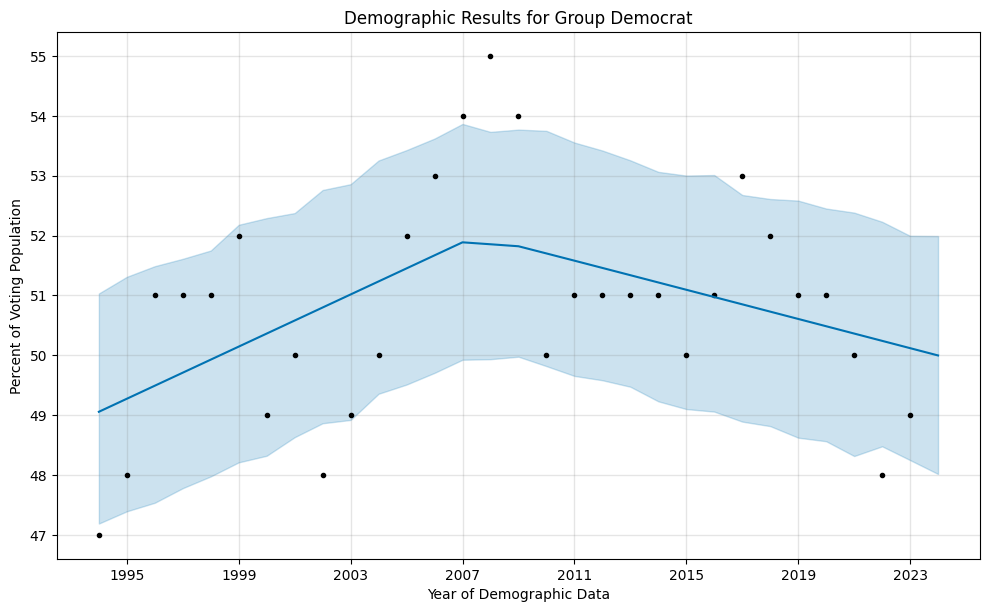

In [30]:
# Plot the Prophet predictions for the trends data
# model_republican.plot(forecast_republican_trends)
from matplotlib import pyplot as plt
fig = model_democrat.plot(forecast_democrat_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Democrat')
plt.show()

In [31]:
# Show forecast_democrat_trends
forecast_democrat_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  50.484200   48.562591   52.450806    50.484200    50.484200   
27 2021-01-01  50.361910   48.315416   52.382353    50.361910    50.361910   
28 2022-01-01  50.239953   48.477759   52.229604    50.239953    50.239953   
29 2023-01-01  50.117997   48.247685   51.994567    50.117997    50.117997   
30 2024-01-01  49.996040   48.015890   51.991180    49.986288    50.005864   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  50.484200  
27                         0.0  50.361910  
28                         0.0  50.239953  
29                         0.0  50.117997  
30                         0.0  49.996040

In [32]:
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_democrat_trends = forecast_democrat_trends.set_index('ds')

In [33]:
#Rename yhat yhat_lower yhat_ upper
forecast_democrat_trends = forecast_democrat_trends.rename(
    columns={
        "yhat_upper": "Dem Best",
        "yhat_lower": "Dem Worst",
        "yhat": "Dem Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_democrat_trends_y_only = forecast_democrat_trends[['Dem Most Likely','Dem Best','Dem Worst']]
forecast_democrat_trends_y_only.head()

Dem Most Likely   Dem Best  Dem Worst
ds                                               
1994-01-01        49.054885  51.031594  47.187433
1995-01-01        49.272547  51.309784  47.391955
1996-01-01        49.490208  51.487389  47.534796
1997-01-01        49.708467  51.610512  47.778794
1998-01-01        49.926128  51.749077  47.975048

In [34]:
# Round columns(Reference: AI assist debug)
forecast_democrat_trends_y_only = forecast_democrat_trends_y_only.round(decimals=1)
forecast_democrat_trends_y_only.head()

Dem Most Likely  Dem Best  Dem Worst
ds                                              
1994-01-01             49.1      51.0       47.2
1995-01-01             49.3      51.3       47.4
1996-01-01             49.5      51.5       47.5
1997-01-01             49.7      51.6       47.8
1998-01-01             49.9      51.7       48.0

<Axes: title={'center': 'Model: Democrats 1994 to 2024'}, xlabel='ds'>

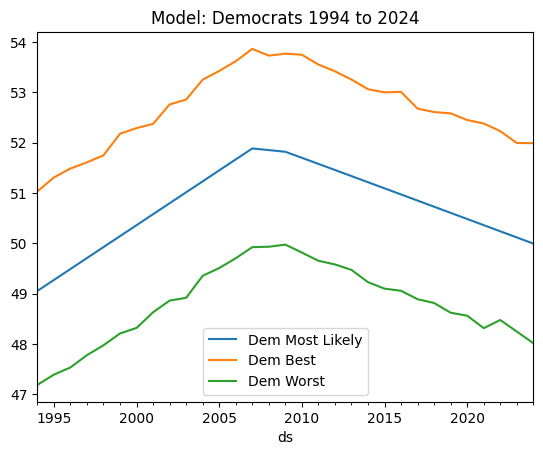

In [35]:
# From the forecast_*_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_democrat_trends[['Dem Most Likely','Dem Best','Dem Worst']].plot(title='Model: Democrats 1994 to 2024')

### Combine Election Results and Projections (Republican and Democrat)

In [36]:
# Slice Rep and Dem Only from Original Data Base
rep_and_dem_demog=demographic_df[["Rep","Dem"]]
#for debug only vv
rep_and_dem_demog_reported = rep_and_dem_demog
#Rename columns
rep_and_dem_demog_reported = rep_and_dem_demog_reported.rename(
    columns={
        "Rep": "Rep Reported",
        "Dem": "Dem Reported",
    }
)
rep_and_dem_demog_reported.tail()

Rep Reported  Dem Reported
Year                                  
2019-01-01            46            51
2020-01-01            46            51
2021-01-01            46            50
2022-01-01            48            48
2023-01-01            48            49

In [37]:
# Concat Rep and Dem Models from Prophet Output
combined_model_rep_dem = pd.concat([forecast_republican_trends_y_only,forecast_democrat_trends_y_only],axis='columns',join='inner')
combined_model_rep_dem.rename(columns = {'ds':'Year'}, inplace = True)
combined_model_rep_dem.tail()

Rep Most Likely  Rep Best  Rep Worst  Dem Most Likely  Dem Best  \
ds                                                                            
2020-01-01             46.7      48.7       44.5             50.5      52.5   
2021-01-01             46.8      48.7       44.8             50.4      52.4   
2022-01-01             46.8      49.0       44.9             50.2      52.2   
2023-01-01             46.9      48.8       45.0             50.1      52.0   
2024-01-01             47.0      49.0       45.1             50.0      52.0   

            Dem Worst  
ds                     
2020-01-01       48.6  
2021-01-01       48.3  
2022-01-01       48.5  
2023-01-01       48.2  
2024-01-01       48.0

In [38]:
# Concat Reported and Prophet Data Combined
import numpy as np
compare_rep_dem = pd.concat([rep_and_dem_demog_reported,combined_model_rep_dem],axis='columns',join='inner')
compare_rep_dem.tail()

Rep Reported  Dem Reported  Rep Most Likely  Rep Best  Rep Worst  \
2019-01-01            46            51             46.6      48.7       44.6   
2020-01-01            46            51             46.7      48.7       44.5   
2021-01-01            46            50             46.8      48.7       44.8   
2022-01-01            48            48             46.8      49.0       44.9   
2023-01-01            48            49             46.9      48.8       45.0   

            Dem Most Likely  Dem Best  Dem Worst  
2019-01-01             50.6      52.6       48.6  
2020-01-01             50.5      52.5       48.6  
2021-01-01             50.4      52.4       48.3  
2022-01-01             50.2      52.2       48.5  
2023-01-01             50.1      52.0       48.2

<Axes: title={'center': 'Comparison: Reported Voting and Pew Poll Data'}>

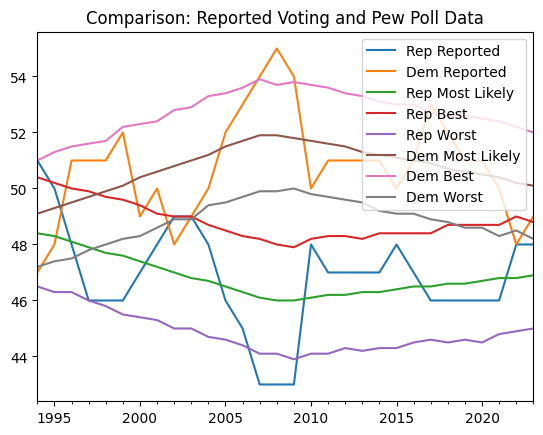

In [39]:
compare_rep_dem[['Rep Reported','Dem Reported','Rep Most Likely','Rep Best','Rep Worst','Dem Most Likely','Dem Best','Dem Worst']].plot(title='Comparison: Reported Voting and Pew Poll Data')

<Axes: title={'center': 'Comparison: Reported Voting Results and Pew Poll Data'}>

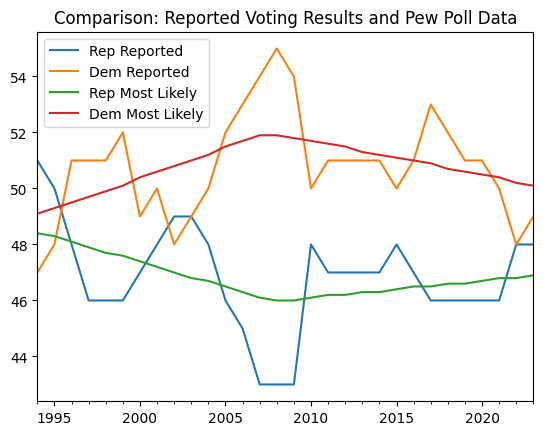

In [40]:
# Above chart is too messy.
# Clean up data by removing columns
compare_rep_dem[['Rep Reported','Dem Reported','Rep Most Likely','Dem Most Likely']].plot(title='Comparison: Reported Voting Results and Pew Poll Data')


### Analysis and Conclusions:  Reported Voting Results and Pew Data
The Pew Data models trend closer to center.
The largest variance is in 2007 and 2008 when Republican candidate votes dropped to 43% and the polled Republican/Leaning Republicaninformation indicated 46% polling.  This was the election cycle for President Obama.


The Democrat/leaning Democrat was at its highest in the same cycle, but
the polling results were closer those years.  The most significant
differences from reported election results to polled for Democrats/Leaning Democrat occuring in non-presidential election years 2002 and 2010.

# Demographic Analysis Group 1:  Men and Women Groups
The following is a review and analysis of Pew's grouping for "Men" and "Women", the direction of trends, and likely impact of trends on future elections.

Groups 1A through 1D by Column Title:   'Men Rep', 'Men Dem','Women Rep','Women Dem'

## Demographic Group 1A:  Men Republican (and Leaning Republican)

In [41]:
# Men: Republican Demographic Dataframe
republican_men_df = demographic_df.loc["1994-01-01":"2023-01-01"][["Men Rep"]]
display(republican_men_df.head())
republican_men_df.tail()

Men Rep
Year               
1994-01-01       56
1995-01-01       56
1996-01-01       53
1997-01-01       53
1998-01-01       51

Men Rep
Year               
2019-01-01       49
2020-01-01       50
2021-01-01       50
2022-01-01       52
2023-01-01       52

<Axes: title={'center': 'Republican Men and Leaning'}, xlabel='Year'>

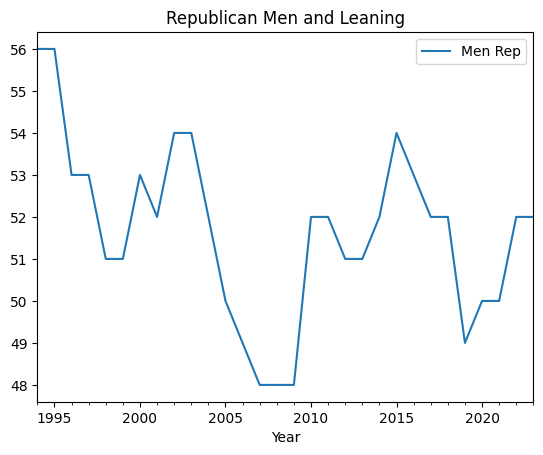

In [42]:
# Plot demographic
republican_men_df.plot(title="Republican Men and Leaning")

Start Prophet Model for Demographic:  Republican (and Leaning) Men

In [43]:
# Generate Prophet Model for Next Year
# Using the demographic DataFrame, reset the index so the date information is no longer the index
republican_men_prophet_df = republican_men_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
republican_men_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
republican_men_prophet_df = republican_men_prophet_df.dropna()
# View the DataFrame
display(republican_men_prophet_df.tail())

In [44]:
# Call the Prophet function, store as an object
model_republican_men = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_republican_men.fit(republican_men_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/9_0wxj0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/t5et4p1x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28451', 'data', 'file=/tmp/tmpmebgaej8/9_0wxj0g.json', 'init=/tmp/tmpmebgaej8/t5et4p1x.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modeltr52uo9p/prophet_model-20240531005700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [45]:
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_republican_men_trends = model_republican_men.make_future_dataframe(periods=1, freq="A")

# View the last five rows of the future DataFrame
display(future_republican_men_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

In [46]:
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_republican_men_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_republican_men_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

In [47]:
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_republican_men_trends=model_republican_men.predict(future_republican_men_trends)
# Display the last five rows of the forecast_*_trends DataFrame
forecast_republican_men_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  51.240214   49.146276   53.168996    51.240214    51.240214   
27 2021-01-01  51.283785   49.090035   53.425980    51.283785    51.283785   
28 2022-01-01  51.327236   49.188765   53.402252    51.327236    51.327236   
29 2023-01-01  51.370687   49.225536   53.373203    51.370687    51.370687   
30 2024-01-01  51.414139   49.251560   53.488306    51.405730    51.423188   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  51.240214  
27                         0.0  51.283785  
28                         0.0  51.327236  
29                         0.0  51.370687  
30                         0.0  51.414139

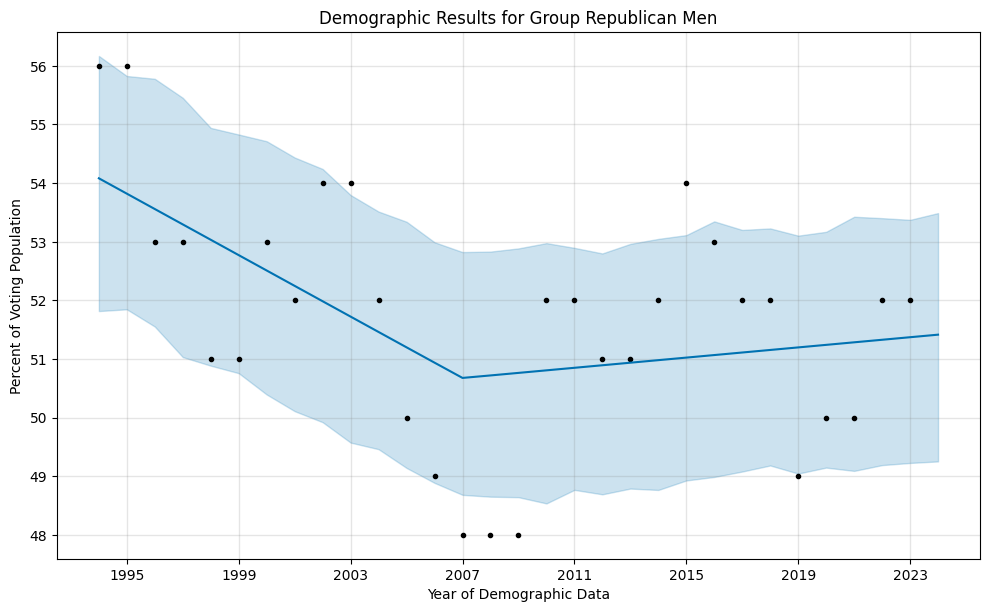

In [48]:
# Plot the Prophet predictions for the trends data
from matplotlib import pyplot as plt
fig = model_republican_men.plot(forecast_republican_men_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Republican Men')
plt.show()

In [49]:
# Show forecast_republican_men_trends
forecast_republican_men_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  51.240214   49.146276   53.168996    51.240214    51.240214   
27 2021-01-01  51.283785   49.090035   53.425980    51.283785    51.283785   
28 2022-01-01  51.327236   49.188765   53.402252    51.327236    51.327236   
29 2023-01-01  51.370687   49.225536   53.373203    51.370687    51.370687   
30 2024-01-01  51.414139   49.251560   53.488306    51.405730    51.423188   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  51.240214  
27                         0.0  51.283785  
28                         0.0  51.327236  
29                         0.0  51.370687  
30                         0.0  51.414139

In [50]:
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_republican_men_trends = forecast_republican_men_trends.set_index('ds')
forecast_republican_men_trends.tail()

trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                        
2020-01-01  51.240214   49.146276   53.168996    51.240214    51.240214   
2021-01-01  51.283785   49.090035   53.425980    51.283785    51.283785   
2022-01-01  51.327236   49.188765   53.402252    51.327236    51.327236   
2023-01-01  51.370687   49.225536   53.373203    51.370687    51.370687   
2024-01-01  51.414139   49.251560   53.488306    51.405730    51.423188   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2020-01-01             0.0                   0.0                   0.0   
2021-01-01             0.0                   0.0                   0.0   
2022-01-01             0.0                   0.0                   0.0   
2023-01-01             0.0                   0.0                   0.0   
2024-01-01             0.0                   0.0                   0.0   

            multiplicative_terms  multiplicative_terms_lower  \
ds                                                             
2020-01-01                   0.0                         0.0   
2021-01-01                   0.0                         0.0   
2022-01-01                   0.0                         0.0   
2023-01-01                   0.0                         0.0   
2024-01-01                   0.0                         0.0   

            multiplicative_terms_upper       yhat  
ds                                                 
2020-01-01                         0.0  51.240214  
2021-01-01                         0.0  51.283785  
2022-01-01                         0.0  51.327236  
2023-01-01                         0.0  51.370687  
2024-01-01                         0.0  51.414139

In [51]:
#Rename yhat yhat_lower yhat_ upper
forecast_republican_men_trends = forecast_republican_men_trends.rename(
    columns={
        "yhat_upper": "R Men Best",
        "yhat_lower": "R Men Worst",
        "yhat": "R Men Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_republican_men_trends_y_only = forecast_republican_men_trends[['R Men Most Likely','R Men Best','R Men Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_republican_men_trends_y_only = forecast_republican_men_trends_y_only.round(decimals=1)
forecast_republican_men_trends_y_only.head()

R Men Most Likely  R Men Best  R Men Worst
ds                                                    
1994-01-01               54.1        56.2         51.8
1995-01-01               53.8        55.8         51.8
1996-01-01               53.6        55.8         51.6
1997-01-01               53.3        55.5         51.0
1998-01-01               53.0        54.9         50.9

<Axes: title={'center': 'Model: Republican Men or Leaning 1994 to 2024'}, xlabel='ds'>

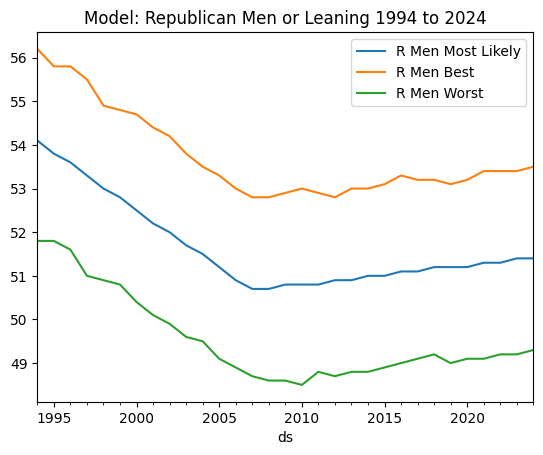

In [52]:
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_republican_men_trends_y_only[['R Men Most Likely','R Men Best','R Men Worst']].plot(title='Model: Republican Men or Leaning 1994 to 2024')

## Demographic Group 2B:  Republican Women (and Leaning Republican)

In [53]:
# Women: Republican Demographic Dataframe
republican_women_df = demographic_df.loc["1994-01-01":"2023-01-01"][["Women Rep"]]
display(republican_women_df.head())
republican_women_df.tail()

Women Rep
Year                 
1994-01-01         46
1995-01-01         46
1996-01-01         43
1997-01-01         41
1998-01-01         42

Women Rep
Year                 
2019-01-01         43
2020-01-01         42
2021-01-01         42
2022-01-01         46
2023-01-01         44

<Axes: title={'center': 'Republican Women and Leaning'}, xlabel='Year'>

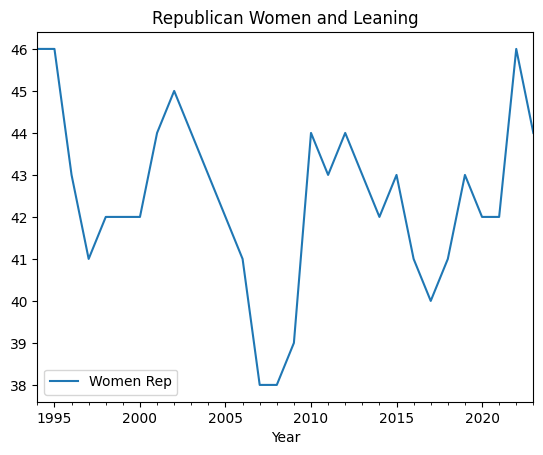

In [54]:
# Plot demographic
republican_women_df.plot(title="Republican Women and Leaning")

Start Prophet Model for Demographic:  Republican Women (or Leaning)

In [55]:
# Generate Prophet Model for Next Year
# Using the demographic DataFrame, reset the index so the date information is no longer the index
republican_women_prophet_df = republican_women_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
republican_women_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
republican_women_prophet_df = republican_women_prophet_df.dropna()
# View the DataFrame
display(republican_women_prophet_df.tail())

In [56]:
# Call the Prophet function, store as an object
model_republican_women = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_republican_women.fit(republican_women_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/v07bzgnj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/p65sfhx7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43938', 'data', 'file=/tmp/tmpmebgaej8/v07bzgnj.json', 'init=/tmp/tmpmebgaej8/p65sfhx7.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelp880ugzd/prophet_model-20240531005703.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [57]:
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_republican_women_trends = model_republican_women.make_future_dataframe(periods=1, freq="A")

# View the last five rows of the future DataFrame
display(future_republican_women_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

In [58]:
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_republican_women_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_republican_women_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

In [59]:
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_republican_women_trends=model_republican_women.predict(future_republican_women_trends)
# Display the last five rows of the forecast_*_trends DataFrame
forecast_republican_women_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  42.382240   39.872690   44.960017    42.382240    42.382240   
27 2021-01-01  42.414707   40.003743   44.936393    42.414707    42.414707   
28 2022-01-01  42.447086   40.012417   44.725046    42.447086    42.447086   
29 2023-01-01  42.479464   40.211617   44.774783    42.479464    42.479464   
30 2024-01-01  42.511842   40.251676   45.010394    42.507389    42.516485   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  42.382240  
27                         0.0  42.414707  
28                         0.0  42.447086  
29                         0.0  42.479464  
30                         0.0  42.511842

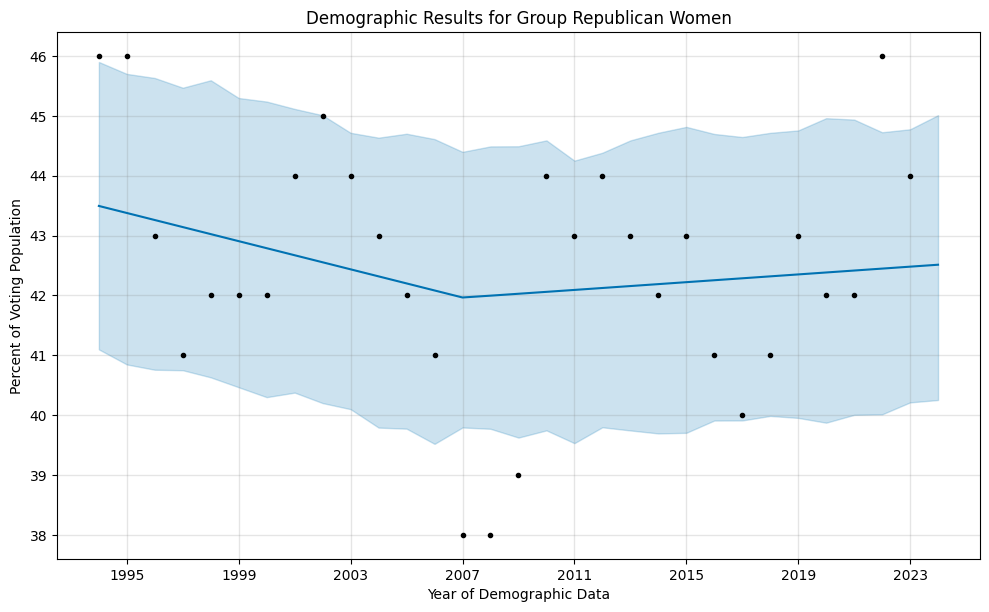

In [60]:
# Plot the Prophet predictions for the trends data
from matplotlib import pyplot as plt
fig = model_republican_women.plot(forecast_republican_women_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Republican Women')
plt.show()

In [61]:
# Show forecast_*_trends
forecast_republican_women_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  42.382240   39.872690   44.960017    42.382240    42.382240   
27 2021-01-01  42.414707   40.003743   44.936393    42.414707    42.414707   
28 2022-01-01  42.447086   40.012417   44.725046    42.447086    42.447086   
29 2023-01-01  42.479464   40.211617   44.774783    42.479464    42.479464   
30 2024-01-01  42.511842   40.251676   45.010394    42.507389    42.516485   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  42.382240  
27                         0.0  42.414707  
28                         0.0  42.447086  
29                         0.0  42.479464  
30                         0.0  42.511842

In [62]:
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_republican_women_trends = forecast_republican_women_trends.set_index('ds')
forecast_republican_women_trends.tail()

trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                        
2020-01-01  42.382240   39.872690   44.960017    42.382240    42.382240   
2021-01-01  42.414707   40.003743   44.936393    42.414707    42.414707   
2022-01-01  42.447086   40.012417   44.725046    42.447086    42.447086   
2023-01-01  42.479464   40.211617   44.774783    42.479464    42.479464   
2024-01-01  42.511842   40.251676   45.010394    42.507389    42.516485   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2020-01-01             0.0                   0.0                   0.0   
2021-01-01             0.0                   0.0                   0.0   
2022-01-01             0.0                   0.0                   0.0   
2023-01-01             0.0                   0.0                   0.0   
2024-01-01             0.0                   0.0                   0.0   

            multiplicative_terms  multiplicative_terms_lower  \
ds                                                             
2020-01-01                   0.0                         0.0   
2021-01-01                   0.0                         0.0   
2022-01-01                   0.0                         0.0   
2023-01-01                   0.0                         0.0   
2024-01-01                   0.0                         0.0   

            multiplicative_terms_upper       yhat  
ds                                                 
2020-01-01                         0.0  42.382240  
2021-01-01                         0.0  42.414707  
2022-01-01                         0.0  42.447086  
2023-01-01                         0.0  42.479464  
2024-01-01                         0.0  42.511842

In [63]:
#Rename yhat yhat_lower yhat_ upper
forecast_republican_women_trends = forecast_republican_women_trends.rename(
    columns={
        "yhat_upper": "R Women Best",
        "yhat_lower": "R Women Worst",
        "yhat": "R Women Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_republican_women_trends_y_only = forecast_republican_women_trends[['R Women Most Likely','R Women Best','R Women Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_republican_women_trends_y_only = forecast_republican_women_trends_y_only.round(decimals=1)
forecast_republican_women_trends_y_only.head()

R Women Most Likely  R Women Best  R Women Worst
ds                                                          
1994-01-01                 43.5          45.9           41.1
1995-01-01                 43.4          45.7           40.8
1996-01-01                 43.3          45.6           40.8
1997-01-01                 43.1          45.5           40.7
1998-01-01                 43.0          45.6           40.6

<Axes: title={'center': 'Model: Republican Women or Leaning 1994 to 2024'}, xlabel='ds'>

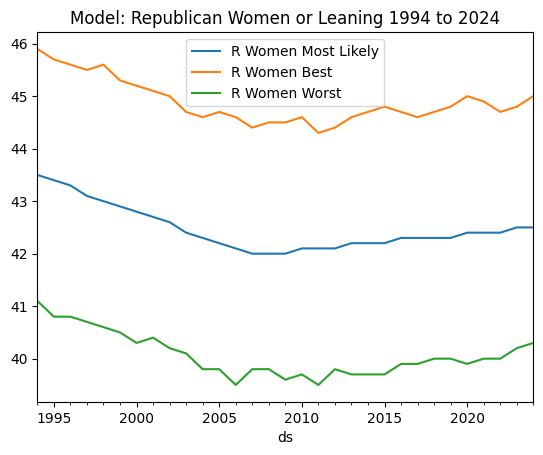

In [64]:
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_republican_women_trends_y_only[['R Women Most Likely','R Women Best','R Women Worst']].plot(title='Model: Republican Women or Leaning 1994 to 2024')

## Demographic Group 1C:  Democrat Men (and Leaning Democrat)

In [65]:
# Men: Democrat Demographic Dataframe
democrat_men_df = demographic_df.loc["1994-01-01":"2023-01-01"][["Men Dem"]]
display(democrat_men_df.head())
democrat_men_df.tail()

Men Dem
Year               
1994-01-01       42
1995-01-01       43
1996-01-01       45
1997-01-01       45
1998-01-01       47

Men Dem
Year               
2019-01-01       48
2020-01-01       47
2021-01-01       47
2022-01-01       44
2023-01-01       46

<Axes: title={'center': 'Democrat Men and Leaning'}, xlabel='Year'>

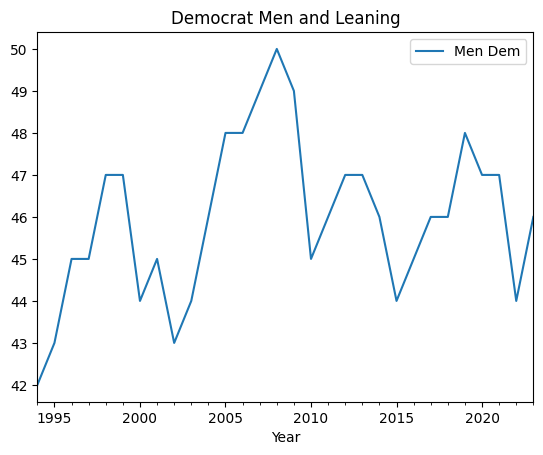

In [66]:
# Plot demographic
democrat_men_df.plot(title="Democrat Men and Leaning")

In [67]:
# Generate Prophet Model for Next Year
# Using the demographic DataFrame, reset the index so the date information is no longer the index
democrat_men_prophet_df = democrat_men_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
democrat_men_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
democrat_men_prophet_df = democrat_men_prophet_df.dropna()
# View the DataFrame
display(democrat_men_prophet_df.tail())

In [68]:
# Call the Prophet function, store as an object
model_democrat_men = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_democrat_men.fit(democrat_men_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/yzi5yj9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/v52p3rov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83664', 'data', 'file=/tmp/tmpmebgaej8/yzi5yj9t.json', 'init=/tmp/tmpmebgaej8/v52p3rov.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelq_9mjmxv/prophet_model-20240531005704.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [69]:
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_democrat_men_trends = model_democrat_men.make_future_dataframe(periods=1, freq="A")

# View the last five rows of the future DataFrame
display(future_democrat_men_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

In [70]:
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_democrat_men_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_democrat_men_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

In [71]:
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_democrat_men_trends=model_democrat_men.predict(future_democrat_men_trends)
# Display the last five rows of the forecast_*_trends DataFrame
forecast_democrat_men_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  46.201431   44.259944   48.100827    46.201431    46.201431   
27 2021-01-01  46.148947   44.175977   48.117244    46.148947    46.148947   
28 2022-01-01  46.096607   44.069348   48.079969    46.096607    46.096607   
29 2023-01-01  46.044267   44.068196   48.155618    46.044267    46.044267   
30 2024-01-01  45.991927   43.980110   47.930716    45.983480    45.999674   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  46.201431  
27                         0.0  46.148947  
28                         0.0  46.096607  
29                         0.0  46.044267  
30                         0.0  45.991927

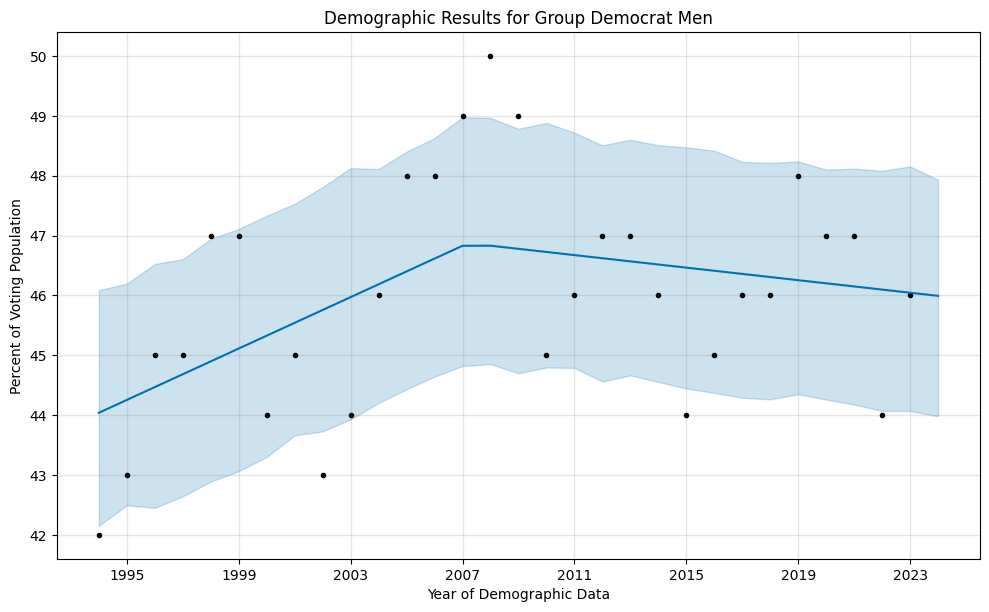

In [72]:
# Plot the Prophet predictions for the trends data
from matplotlib import pyplot as plt
fig = model_democrat_men.plot(forecast_democrat_men_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Democrat Men')
plt.show()

In [73]:
# Show forecast_*_trends
forecast_democrat_men_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  46.201431   44.259944   48.100827    46.201431    46.201431   
27 2021-01-01  46.148947   44.175977   48.117244    46.148947    46.148947   
28 2022-01-01  46.096607   44.069348   48.079969    46.096607    46.096607   
29 2023-01-01  46.044267   44.068196   48.155618    46.044267    46.044267   
30 2024-01-01  45.991927   43.980110   47.930716    45.983480    45.999674   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  46.201431  
27                         0.0  46.148947  
28                         0.0  46.096607  
29                         0.0  46.044267  
30                         0.0  45.991927

In [74]:
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_democrat_men_trends = forecast_democrat_men_trends.set_index('ds')
forecast_democrat_men_trends.tail()

trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                        
2020-01-01  46.201431   44.259944   48.100827    46.201431    46.201431   
2021-01-01  46.148947   44.175977   48.117244    46.148947    46.148947   
2022-01-01  46.096607   44.069348   48.079969    46.096607    46.096607   
2023-01-01  46.044267   44.068196   48.155618    46.044267    46.044267   
2024-01-01  45.991927   43.980110   47.930716    45.983480    45.999674   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2020-01-01             0.0                   0.0                   0.0   
2021-01-01             0.0                   0.0                   0.0   
2022-01-01             0.0                   0.0                   0.0   
2023-01-01             0.0                   0.0                   0.0   
2024-01-01             0.0                   0.0                   0.0   

            multiplicative_terms  multiplicative_terms_lower  \
ds                                                             
2020-01-01                   0.0                         0.0   
2021-01-01                   0.0                         0.0   
2022-01-01                   0.0                         0.0   
2023-01-01                   0.0                         0.0   
2024-01-01                   0.0                         0.0   

            multiplicative_terms_upper       yhat  
ds                                                 
2020-01-01                         0.0  46.201431  
2021-01-01                         0.0  46.148947  
2022-01-01                         0.0  46.096607  
2023-01-01                         0.0  46.044267  
2024-01-01                         0.0  45.991927

In [75]:
#Rename yhat yhat_lower yhat_ upper
forecast_democrat_men_trends = forecast_democrat_men_trends.rename(
    columns={
        "yhat_upper": "D Men Best",
        "yhat_lower": "D Men Worst",
        "yhat": "D Men Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_democrat_men_trends_y_only = forecast_democrat_men_trends[['D Men Most Likely','D Men Best','D Men Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_democrat_men_trends_y_only = forecast_democrat_men_trends_y_only.round(decimals=1)
forecast_democrat_men_trends_y_only.head()

D Men Most Likely  D Men Best  D Men Worst
ds                                                    
1994-01-01               44.0        46.1         42.2
1995-01-01               44.3        46.2         42.5
1996-01-01               44.5        46.5         42.4
1997-01-01               44.7        46.6         42.6
1998-01-01               44.9        46.9         42.9

<Axes: title={'center': 'Model: Democrat Men or Leaning 1994 to 2024'}, xlabel='ds'>

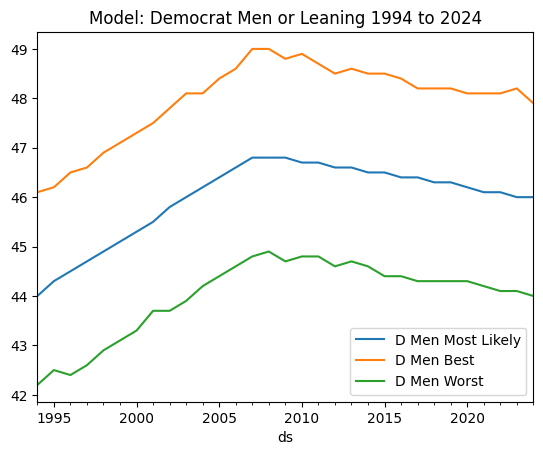

In [76]:
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_democrat_men_trends_y_only[['D Men Most Likely','D Men Best','D Men Worst']].plot(title='Model: Democrat Men or Leaning 1994 to 2024')

## Demographic Group 1D:  Democrat Women (and Leaning Democrat)

In [77]:
# Women: Democrat Demographic Dataframe
democrat_women_df = demographic_df.loc["1994-01-01":"2023-01-01"][["Women Dem"]]
display(democrat_women_df.head())
democrat_women_df.tail()

Women Dem
Year                 
1994-01-01         52
1995-01-01         52
1996-01-01         55
1997-01-01         57
1998-01-01         56

Women Dem
Year                 
2019-01-01         54
2020-01-01         54
2021-01-01         53
2022-01-01         51
2023-01-01         51

<Axes: title={'center': 'Democrat Women and Leaning'}, xlabel='Year'>

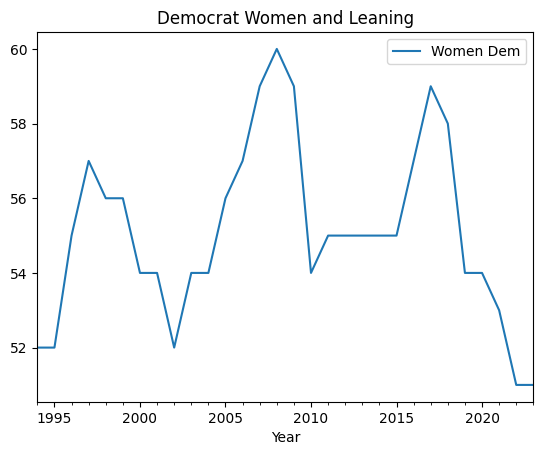

In [78]:
# Plot demographic
democrat_women_df.plot(title="Democrat Women and Leaning")

In [79]:
# Generate Prophet Model for Next Year
# Using the demographic DataFrame, reset the index so the date information is no longer the index
democrat_women_prophet_df = democrat_women_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
democrat_women_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
democrat_women_prophet_df = democrat_women_prophet_df.dropna()
# View the DataFrame
# display(democrat_women_prophet_df.tail())

In [80]:
# Call the Prophet function, store as an object
model_democrat_women = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_democrat_women.fit(democrat_women_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/o4hbwe8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/k5o092dg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50028', 'data', 'file=/tmp/tmpmebgaej8/o4hbwe8o.json', 'init=/tmp/tmpmebgaej8/k5o092dg.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelyiudb2_9/prophet_model-20240531005706.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [81]:
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_democrat_women_trends = model_democrat_women.make_future_dataframe(periods=1, freq="A")
# View the last five rows of the future DataFrame
display(future_democrat_women_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

In [82]:
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_democrat_women_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_democrat_women_trends.tail())

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

In [83]:
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_democrat_women_trends=model_democrat_women.predict(future_democrat_women_trends)
# Display the last five rows of the forecast_*_trends DataFrame
forecast_democrat_women_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  54.381241   51.801719   57.085767    54.381241    54.381241   
27 2021-01-01  54.214682   51.596657   56.893757    54.214682    54.214682   
28 2022-01-01  54.048579   51.568218   56.723685    54.048579    54.048579   
29 2023-01-01  53.882475   51.313801   56.498128    53.882475    53.882475   
30 2024-01-01  53.716371   51.159019   56.472854    53.707052    53.726439   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  54.381241  
27                         0.0  54.214682  
28                         0.0  54.048579  
29                         0.0  53.882475  
30                         0.0  53.716371

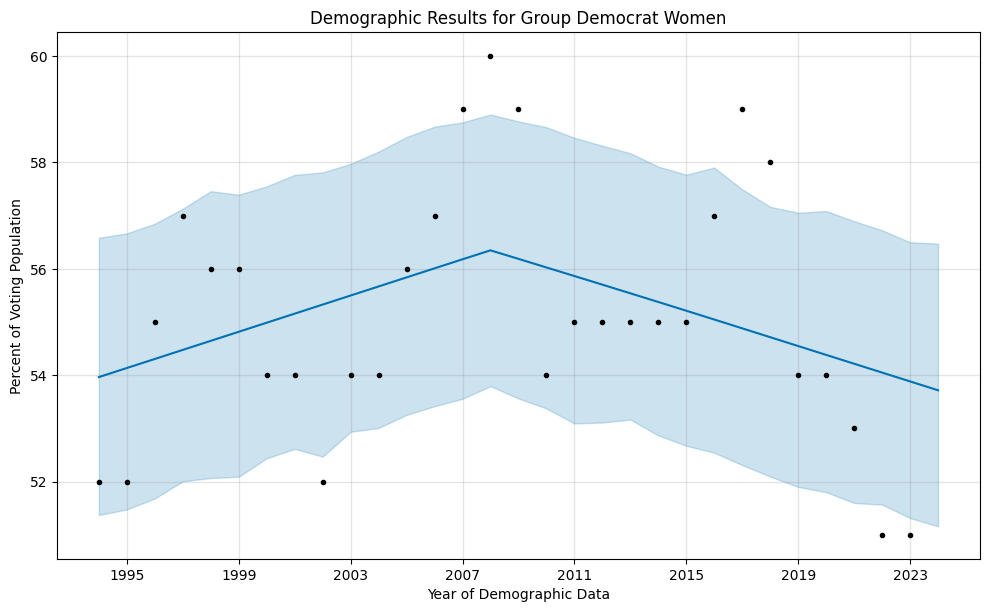

In [84]:
# Plot the Prophet predictions for the trends data
from matplotlib import pyplot as plt
fig = model_democrat_women.plot(forecast_democrat_women_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Democrat Women')
plt.show()

In [85]:
# Show forecast_*_trends
forecast_democrat_women_trends.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  54.381241   51.801719   57.085767    54.381241    54.381241   
27 2021-01-01  54.214682   51.596657   56.893757    54.214682    54.214682   
28 2022-01-01  54.048579   51.568218   56.723685    54.048579    54.048579   
29 2023-01-01  53.882475   51.313801   56.498128    53.882475    53.882475   
30 2024-01-01  53.716371   51.159019   56.472854    53.707052    53.726439   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  54.381241  
27                         0.0  54.214682  
28                         0.0  54.048579  
29                         0.0  53.882475  
30                         0.0  53.716371

In [86]:
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_democrat_women_trends = forecast_democrat_women_trends.set_index('ds')
forecast_democrat_women_trends.tail()

trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                        
2020-01-01  54.381241   51.801719   57.085767    54.381241    54.381241   
2021-01-01  54.214682   51.596657   56.893757    54.214682    54.214682   
2022-01-01  54.048579   51.568218   56.723685    54.048579    54.048579   
2023-01-01  53.882475   51.313801   56.498128    53.882475    53.882475   
2024-01-01  53.716371   51.159019   56.472854    53.707052    53.726439   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2020-01-01             0.0                   0.0                   0.0   
2021-01-01             0.0                   0.0                   0.0   
2022-01-01             0.0                   0.0                   0.0   
2023-01-01             0.0                   0.0                   0.0   
2024-01-01             0.0                   0.0                   0.0   

            multiplicative_terms  multiplicative_terms_lower  \
ds                                                             
2020-01-01                   0.0                         0.0   
2021-01-01                   0.0                         0.0   
2022-01-01                   0.0                         0.0   
2023-01-01                   0.0                         0.0   
2024-01-01                   0.0                         0.0   

            multiplicative_terms_upper       yhat  
ds                                                 
2020-01-01                         0.0  54.381241  
2021-01-01                         0.0  54.214682  
2022-01-01                         0.0  54.048579  
2023-01-01                         0.0  53.882475  
2024-01-01                         0.0  53.716371

In [87]:
#Rename yhat yhat_lower yhat_ upper
forecast_democrat_women_trends = forecast_democrat_women_trends.rename(
    columns={
        "yhat_upper": "D Women Best",
        "yhat_lower": "D Women Worst",
        "yhat": "D Women Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_democrat_women_trends_y_only = forecast_democrat_women_trends[['D Women Most Likely','D Women Best','D Women Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_democrat_women_trends_y_only = forecast_democrat_women_trends_y_only.round(decimals=1)
forecast_democrat_women_trends_y_only.head()

D Women Most Likely  D Women Best  D Women Worst
ds                                                          
1994-01-01                 54.0          56.6           51.4
1995-01-01                 54.1          56.7           51.5
1996-01-01                 54.3          56.8           51.7
1997-01-01                 54.5          57.1           52.0
1998-01-01                 54.6          57.5           52.1

<Axes: title={'center': 'Model: Women Democrats or Leaning 1994 to 2024'}, xlabel='ds'>

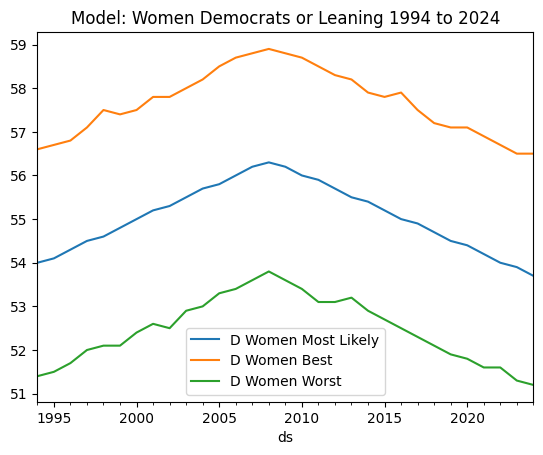

In [88]:
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_democrat_women_trends_y_only[['D Women Most Likely','D Women Best','D Women Worst']].plot(title='Model: Women Democrats or Leaning 1994 to 2024')

In [89]:
# Concat Rep and Dem Women and Men Models from Prophet Output
combined_model_rep_dem_women_men = pd.concat([forecast_republican_men_trends_y_only,
                                              forecast_republican_women_trends_y_only,
                                              forecast_democrat_men_trends_y_only,
                                              forecast_democrat_women_trends_y_only],axis='columns',join='inner')
combined_model_rep_dem_women_men.rename(columns = {'ds':'Year'}, inplace = True)
combined_model_rep_dem_women_men_likely = combined_model_rep_dem_women_men[['R Men Most Likely','R Women Most Likely',
                                                                            'D Men Most Likely', 'D Women Most Likely']]
combined_model_rep_dem_women_men_likely.tail()

R Men Most Likely  R Women Most Likely  D Men Most Likely  \
ds                                                                      
2020-01-01               51.2                 42.4               46.2   
2021-01-01               51.3                 42.4               46.1   
2022-01-01               51.3                 42.4               46.1   
2023-01-01               51.4                 42.5               46.0   
2024-01-01               51.4                 42.5               46.0   

            D Women Most Likely  
ds                               
2020-01-01                 54.4  
2021-01-01                 54.2  
2022-01-01                 54.0  
2023-01-01                 53.9  
2024-01-01                 53.7

<Axes: title={'center': 'Demographic Prediction for Men and Women by Major Party'}, xlabel='ds'>

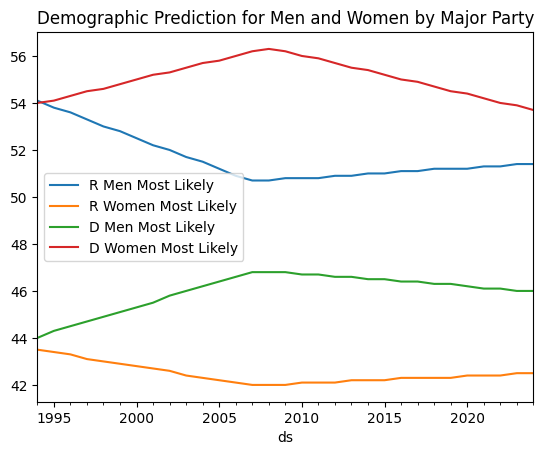

In [90]:
# Plot Demographic
combined_model_rep_dem_women_men_likely.plot(title='Demographic Prediction for Men and Women by Major Party')

### Analysis & Conclusions:  Polling Trends for Men and Women (Major Parties)
Prior to 2008, Republican Men and Republican Women were trending significantly downward while Democrat Men and Woemen were trending significantly upward.

After 2008, 3 groups remained slightly stable.  Republican men and women trend slightly upward, and Democrat men trend slightly downward.  Democrat women trend significantly downard compared to the upward/downward trends of the other 3 groups in this demographic.

# Demographic Analysis Group 2:  Racial Groups
The following is a review and analysis of Pew's Racial and Ethnic groups, the direction of trends, and likely impact of trends on future elections.

Groups by Column Title:  

 'White, non-Hispanic Rep', 'White, non-Hispanic Dem':  1994 through 2023

 'Hispanic Rep', 'Hispanic Dem':  2006 through 2023

 'Black, non-Hispanic Rep', 'Black, non-Hispanic Dem': 1994 through 2023

 'Asian, non-Hispanic Rep', 'Asian, non-Hispanic Dem': 1998 through 2023



### Establish Dataframes for prophet analysis for all groups.

In [91]:
# check demographic_df
display(demographic_df.head())

Rep  Dem  Men Rep  Men Dem  Women Rep  Women Dem  \
Year                                                           
1994-01-01   51   47       56       42         46         52   
1995-01-01   50   48       56       43         46         52   
1996-01-01   48   51       53       45         43         55   
1997-01-01   46   51       53       45         41         57   
1998-01-01   46   51       51       47         42         56   

            White, non-Hispanic Rep  White, non-Hispanic Dem  Hispanic Rep  \
Year                                                                         
1994-01-01                       55                       42           NaN   
1995-01-01                       55                       43           NaN   
1996-01-01                       53                       46           NaN   
1997-01-01                       51                       47           NaN   
1998-01-01                       51                       46           NaN   

            Hispanic Dem  ...  Jewish Rep  Jewish Dem  All unaffiliated Rep  \
Year                      ...                                                 
1994-01-01           NaN  ...          26          72                    38   
1995-01-01           NaN  ...          29          70                    41   
1996-01-01           NaN  ...          29          70                    36   
1997-01-01           NaN  ...          30          68                    33   
1998-01-01           NaN  ...          27          72                    31   

            All unaffiliated Dem  Atheist Rep  Atheist Dem  Agnostic Rep  \
Year                                                                       
1994-01-01                    58          NaN          NaN           NaN   
1995-01-01                    55          NaN          NaN           NaN   
1996-01-01                    62          NaN          NaN           NaN   
1997-01-01                    62          NaN          NaN           NaN   
1998-01-01                    65          NaN          NaN           NaN   

            Agnostic Dem  Nothing in particular Rep  Nothing in particular Dem  
Year                                                                            
1994-01-01           NaN                        NaN                        NaN  
1995-01-01           NaN                        NaN                        NaN  
1996-01-01           NaN                        NaN                        NaN  
1997-01-01           NaN                        NaN                        NaN  
1998-01-01           NaN                        NaN                        NaN  

[5 rows x 60 columns]

In [92]:
# Racial and Ethnic Demographic Dataframes
rep_wht_df = demographic_df.loc["1994-01-01":"2023-01-01"][["White, non-Hispanic Rep"]]
dem_wht_df = demographic_df.loc["1994-01-01":"2023-01-01"][["White, non-Hispanic Dem"]]
rep_hsp_df = demographic_df.loc["2006-01-01":"2023-01-01"][["Hispanic Rep"]]
dem_hsp_df = demographic_df.loc["2006-01-01":"2023-01-01"][["Hispanic Dem"]]
rep_blk_df = demographic_df.loc["1994-01-01":"2023-01-01"][["Black, non-Hispanic Rep"]]
dem_blk_df = demographic_df.loc["1994-01-01":"2023-01-01"][["Black, non-Hispanic Dem"]]
rep_asa_df = demographic_df.loc["1998-01-01":"2023-01-01"][["Asian, non-Hispanic Rep"]]
dem_asa_df = demographic_df.loc["1998-01-01":"2023-01-01"][["Asian, non-Hispanic Dem"]]
display(rep_wht_df.head())
display(dem_wht_df.head())
display(rep_hsp_df.head())
display(dem_hsp_df.head())
display(rep_blk_df.head())
display(dem_blk_df.head())
display(rep_asa_df.head())
display(dem_asa_df.head())


White, non-Hispanic Rep
Year                               
1994-01-01                       55
1995-01-01                       55
1996-01-01                       53
1997-01-01                       51
1998-01-01                       51

White, non-Hispanic Dem
Year                               
1994-01-01                       42
1995-01-01                       43
1996-01-01                       46
1997-01-01                       47
1998-01-01                       46

Hispanic Rep
Year                    
2006-01-01          32.0
2007-01-01          34.0
2008-01-01          30.0
2009-01-01          28.0
2010-01-01          32.0

Hispanic Dem
Year                    
2006-01-01          65.0
2007-01-01          63.0
2008-01-01          69.0
2009-01-01          70.0
2010-01-01          66.0

Black, non-Hispanic Rep
Year                               
1994-01-01                       13
1995-01-01                       12
1996-01-01                       10
1997-01-01                       12
1998-01-01                       12

Black, non-Hispanic Dem
Year                               
1994-01-01                       86
1995-01-01                       86
1996-01-01                       89
1997-01-01                       86
1998-01-01                       86

Asian, non-Hispanic Rep
Year                               
1998-01-01                     38.0
1999-01-01                     40.0
2000-01-01                     44.0
2001-01-01                     47.0
2002-01-01                     44.0

Asian, non-Hispanic Dem
Year                               
1998-01-01                     58.0
1999-01-01                     57.0
2000-01-01                     50.0
2001-01-01                     51.0
2002-01-01                     52.0

<Axes: title={'center': 'Democrat Asian and Leaning'}, xlabel='Year'>

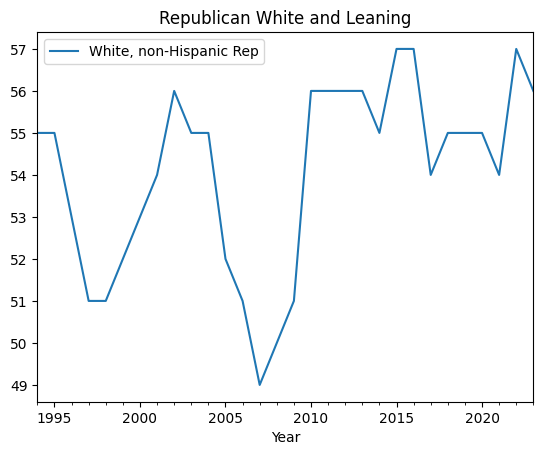

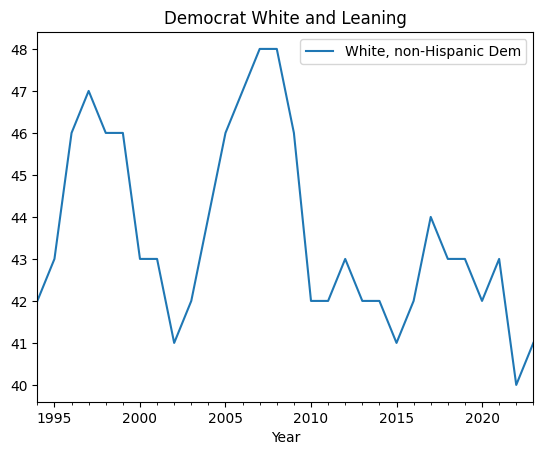

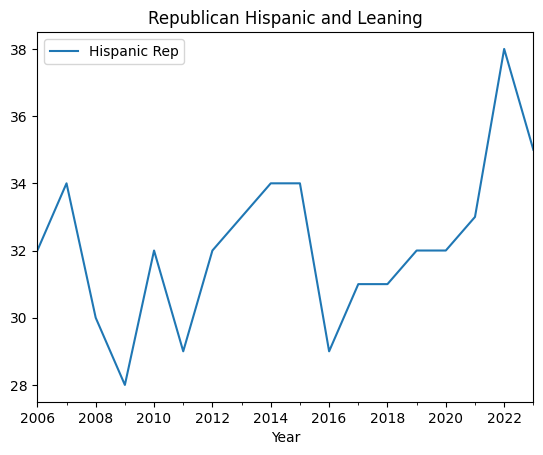

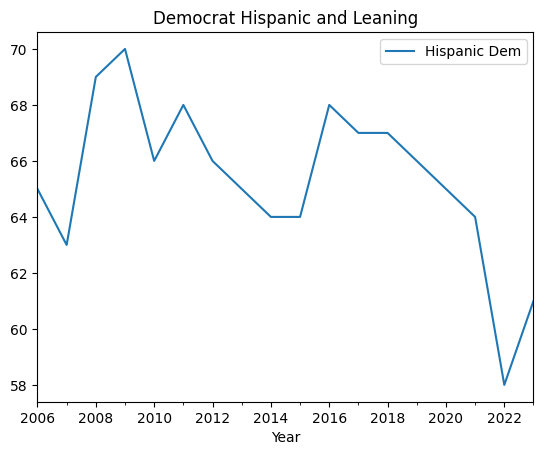

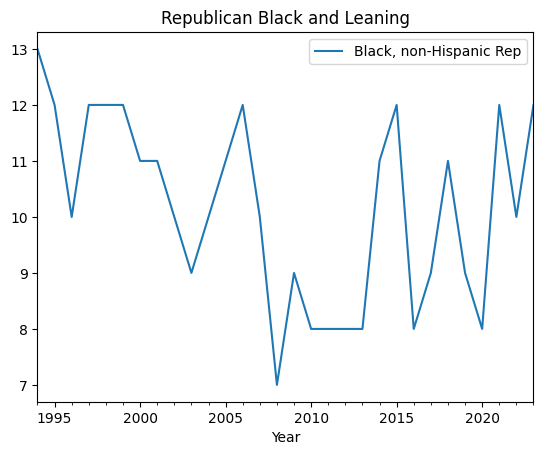

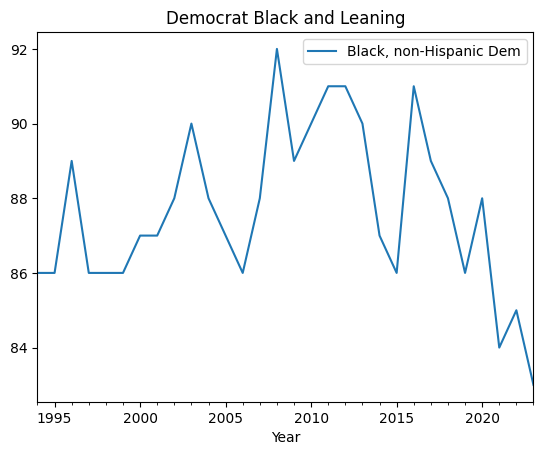

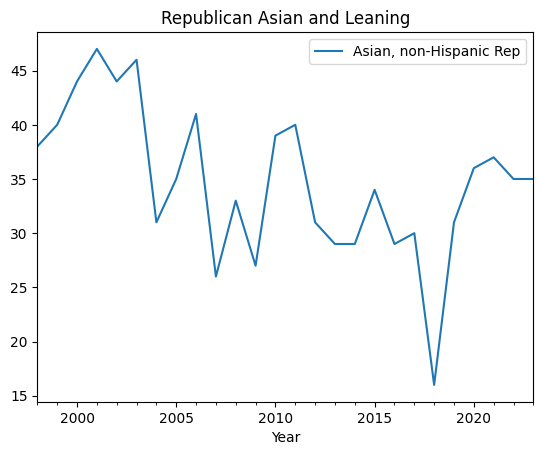

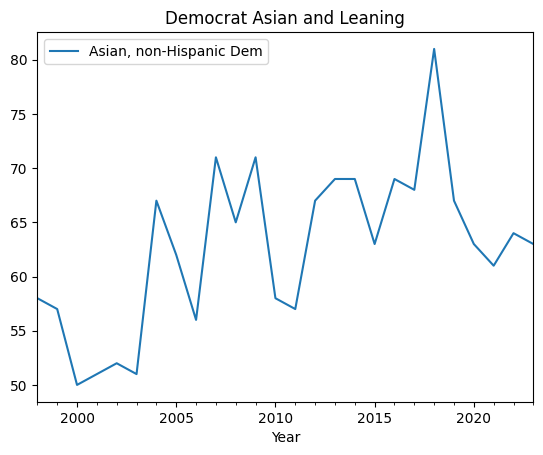

In [93]:
# Plot demographics
rep_wht_df.plot(title="Republican White and Leaning")
dem_wht_df.plot(title="Democrat White and Leaning")
rep_hsp_df.plot(title="Republican Hispanic and Leaning")
dem_hsp_df.plot(title="Democrat Hispanic and Leaning")
rep_blk_df.plot(title="Republican Black and Leaning")
dem_blk_df.plot(title="Democrat Black and Leaning")
rep_asa_df.plot(title="Republican Asian and Leaning")
dem_asa_df.plot(title="Democrat Asian and Leaning")

In [94]:
# Generate Prophet Model for Next Year:  White Republicans or Leaning Republican
# Using the demographic DataFrame, reset the index so the date information is no longer the index
rep_wht_prophet_df = rep_wht_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
rep_wht_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
rep_wht_prophet_df = rep_wht_prophet_df.dropna()
# Call the Prophet function, store as an object
model_rep_wht = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_rep_wht.fit(rep_wht_prophet_df)
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_rep_wht_trends = model_rep_wht.make_future_dataframe(periods=1, freq="A")
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_rep_wht_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_rep_wht_trends.tail())
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_rep_wht_trends=model_rep_wht.predict(future_rep_wht_trends)
# Display the last five rows of the forecast_*_trends DataFrame
display(forecast_rep_wht_trends.tail())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/44hp6rb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/7l4bmg0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=439', 'data', 'file=/tmp/tmpmebgaej8/44hp6rb7.json', 'init=/tmp/tmpmebgaej8/7l4bmg0h.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modeljn360k_j/prophet_model-20240531005712.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  55.373143   52.684147   58.087464    55.373143    55.373143   
27 2021-01-01  55.487819   52.848738   58.202582    55.487819    55.487819   
28 2022-01-01  55.602181   52.949121   58.406308    55.602181    55.602181   
29 2023-01-01  55.716543   53.199364   58.110203    55.716543    55.716543   
30 2024-01-01  55.830905   53.298394   58.474736    55.830734    55.831069   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  55.373143  
27                         0.0  55.487819  
28                         0.0  55.602181  
29                         0.0  55.716543  
30                         0.0  55.830905

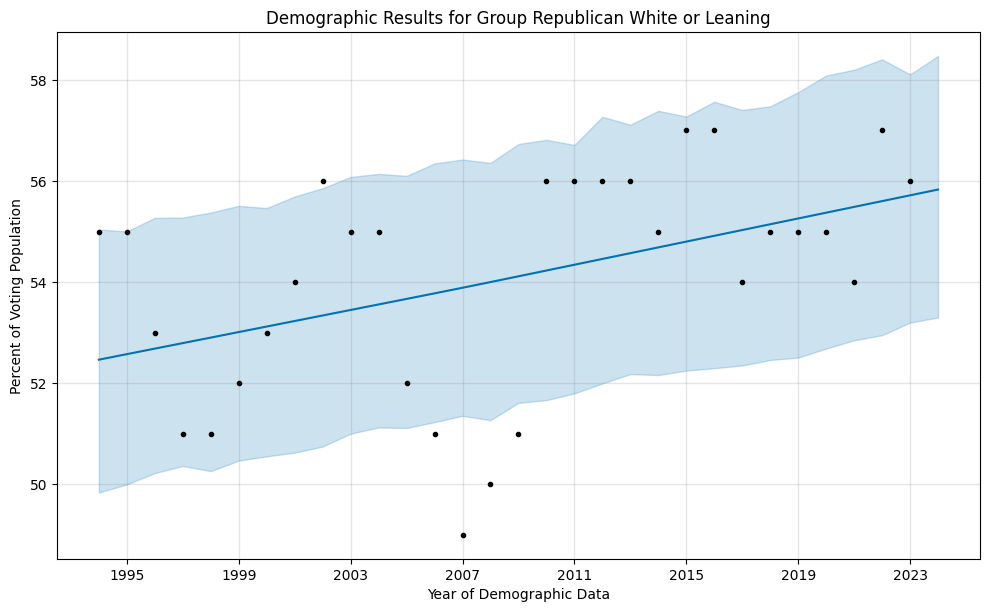

Rep White Most Likely  Rep White Best  Rep White Worst
ds                                                                
2020-01-01                   55.4            58.1             52.7
2021-01-01                   55.5            58.2             52.8
2022-01-01                   55.6            58.4             52.9
2023-01-01                   55.7            58.1             53.2
2024-01-01                   55.8            58.5             53.3

<Axes: title={'center': 'Model: White Republicans or Leaning 1994 to 2024'}, xlabel='ds'>

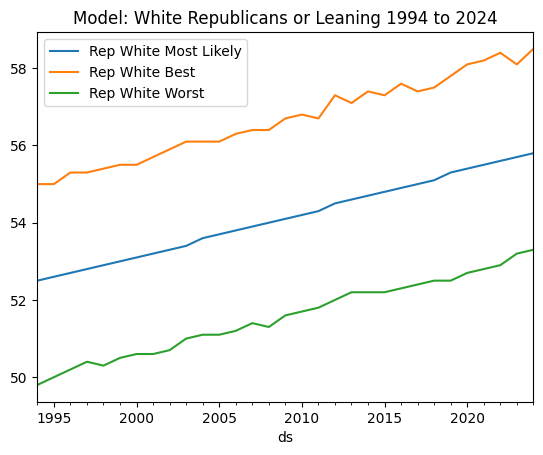

In [95]:
# Plot the Prophet predictions for the trends data: White Republicans or Leaning Republican
from matplotlib import pyplot as plt
fig = model_rep_wht.plot(forecast_rep_wht_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Republican White or Leaning')
plt.show()
#
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_rep_wht_trends = forecast_rep_wht_trends.set_index('ds')
#Rename yhat yhat_lower yhat_ upper
forecast_rep_wht_trends = forecast_rep_wht_trends.rename(
    columns={
        "yhat_upper": "Rep White Best",
        "yhat_lower": "Rep White Worst",
        "yhat": "Rep White Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_rep_wht_trends_y_only = forecast_rep_wht_trends[['Rep White Most Likely','Rep White Best','Rep White Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_rep_wht_trends_y_only = forecast_rep_wht_trends_y_only.round(decimals=1)
display(forecast_rep_wht_trends_y_only.tail())
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_rep_wht_trends_y_only[['Rep White Most Likely','Rep White Best','Rep White Worst']].plot(title='Model: White Republicans or Leaning 1994 to 2024')

In [96]:
# Generate Prophet Model for Next Year: White Democrats or Leaning Democrat
# Using the demographic DataFrame, reset the index so the date information is no longer the index
dem_wht_prophet_df = dem_wht_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
dem_wht_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
dem_wht_prophet_df = dem_wht_prophet_df.dropna()
# View the DataFrame
# display(dem_wht_prophet_df.tail())
# Call the Prophet function, store as an object
model_dem_wht = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_dem_wht.fit(dem_wht_prophet_df)
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_dem_wht_trends = model_dem_wht.make_future_dataframe(periods=1, freq="A")
# View the last five rows of the future DataFrame
display(future_dem_wht_trends.tail())
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_dem_wht_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_dem_wht_trends.tail())
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_dem_wht_trends=model_dem_wht.predict(future_dem_wht_trends)
# Display the last five rows of the forecast_*_trends DataFrame
display(forecast_dem_wht_trends.tail())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/1sdsnirb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/uqx4xbus.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73528', 'data', 'file=/tmp/tmpmebgaej8/1sdsnirb.json', 'init=/tmp/tmpmebgaej8/uqx4xbus.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelohzlo311/prophet_model-20240531005713.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  42.305769   39.652423   44.863862    42.305769    42.305769   
27 2021-01-01  42.192027   39.665894   44.599889    42.192027    42.192027   
28 2022-01-01  42.078596   39.409669   44.694053    42.078596    42.078596   
29 2023-01-01  41.965165   39.353531   44.557737    41.965165    41.965165   
30 2024-01-01  41.851733   39.088418   44.394248    41.851630    41.851849   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  42.305769  
27                         0.0  42.192027  
28                         0.0  42.078596  
29                         0.0  41.965165  
30                         0.0  41.851733

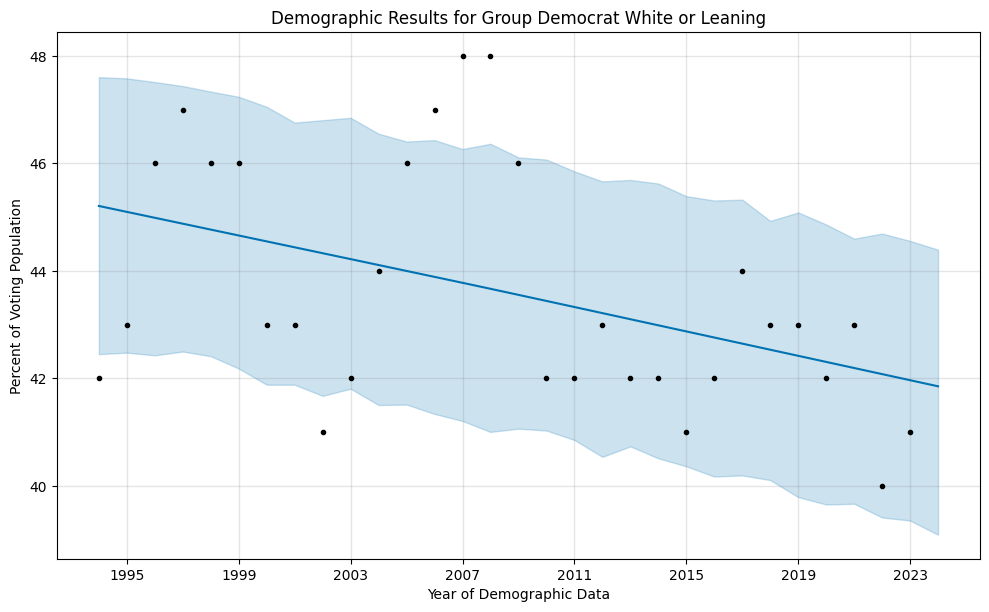

Dem White Most Likely  Dem White Best  Dem White Worst
ds                                                                
2020-01-01                   42.3            44.9             39.7
2021-01-01                   42.2            44.6             39.7
2022-01-01                   42.1            44.7             39.4
2023-01-01                   42.0            44.6             39.4
2024-01-01                   41.9            44.4             39.1

<Axes: title={'center': 'Model: White Democrats or Leaning 1994 to 2024'}, xlabel='ds'>

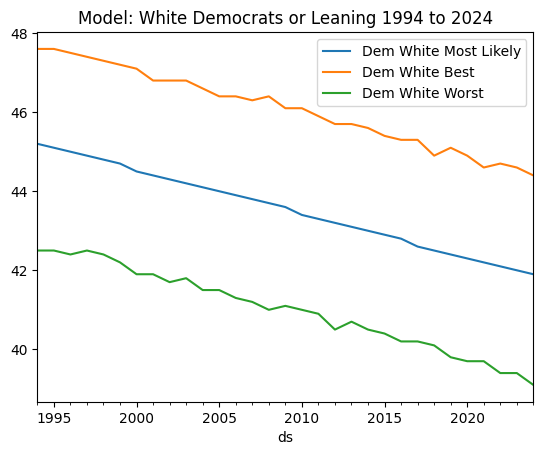

In [97]:
# Plot the Prophet predictions for the trends data: White Democrats or Leaning Democrat
from matplotlib import pyplot as plt
fig = model_dem_wht.plot(forecast_dem_wht_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Democrat White or Leaning')
plt.show()
#
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_dem_wht_trends = forecast_dem_wht_trends.set_index('ds')
#Rename yhat yhat_lower yhat_ upper
forecast_dem_wht_trends = forecast_dem_wht_trends.rename(
    columns={
        "yhat_upper": "Dem White Best",
        "yhat_lower": "Dem White Worst",
        "yhat": "Dem White Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_dem_wht_trends_y_only = forecast_dem_wht_trends[['Dem White Most Likely','Dem White Best','Dem White Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_dem_wht_trends_y_only = forecast_dem_wht_trends_y_only.round(decimals=1)
display(forecast_dem_wht_trends_y_only.tail())
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_dem_wht_trends_y_only[['Dem White Most Likely','Dem White Best','Dem White Worst']].plot(title='Model: White Democrats or Leaning 1994 to 2024')

In [98]:
# Generate Prophet Model for Next Year:  Hispanic Republicans or Leaning Republican
# Using the demographic DataFrame, reset the index so the date information is no longer the index
rep_hsp_prophet_df = rep_hsp_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
rep_hsp_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
rep_hsp_prophet_df = rep_hsp_prophet_df.dropna()
# View the DataFrame
# display(rep_hsp_prophet_df.tail())
# Call the Prophet function, store as an object
model_rep_hsp = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_rep_hsp.fit(rep_hsp_prophet_df)
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_rep_hsp_trends = model_rep_hsp.make_future_dataframe(periods=1, freq="A")
# View the last five rows of the future DataFrame
display(future_rep_hsp_trends.tail())
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_rep_hsp_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_rep_hsp_trends.tail())
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_rep_hsp_trends=model_rep_hsp.predict(future_rep_hsp_trends)
# Display the last five rows of the forecast_*_trends DataFrame
display(forecast_rep_hsp_trends.tail())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/it5g5hk_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/1uhe5ims.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34470', 'data', 'file=/tmp/tmpmebgaej8/it5g5hk_.json', 'init=/tmp/tmpmebgaej8/1uhe5ims.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelgpkfdv5c/prophet_model-20240531005715.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:

ds
14 2020-01-01
15 2021-01-01
16 2022-01-01
17 2023-01-01
18 2023-12-31

ds
14 2020-01-01
15 2021-01-01
16 2022-01-01
17 2023-01-01
18 2024-01-01

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
14 2020-01-01  33.266111   30.814116   36.084684    33.266111    33.266111   
15 2021-01-01  33.462973   30.844427   35.991908    33.462973    33.462973   
16 2022-01-01  33.659298   31.028423   36.284522    33.659298    33.659298   
17 2023-01-01  33.855622   31.032448   36.573716    33.855622    33.855622   
18 2024-01-01  34.051946   31.360129   36.776810    34.051946    34.051946   

    additive_terms  additive_terms_lower  additive_terms_upper  \
14             0.0                   0.0                   0.0   
15             0.0                   0.0                   0.0   
16             0.0                   0.0                   0.0   
17             0.0                   0.0                   0.0   
18             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
14                   0.0                         0.0   
15                   0.0                         0.0   
16                   0.0                         0.0   
17                   0.0                         0.0   
18                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
14                         0.0  33.266111  
15                         0.0  33.462973  
16                         0.0  33.659298  
17                         0.0  33.855622  
18                         0.0  34.051946

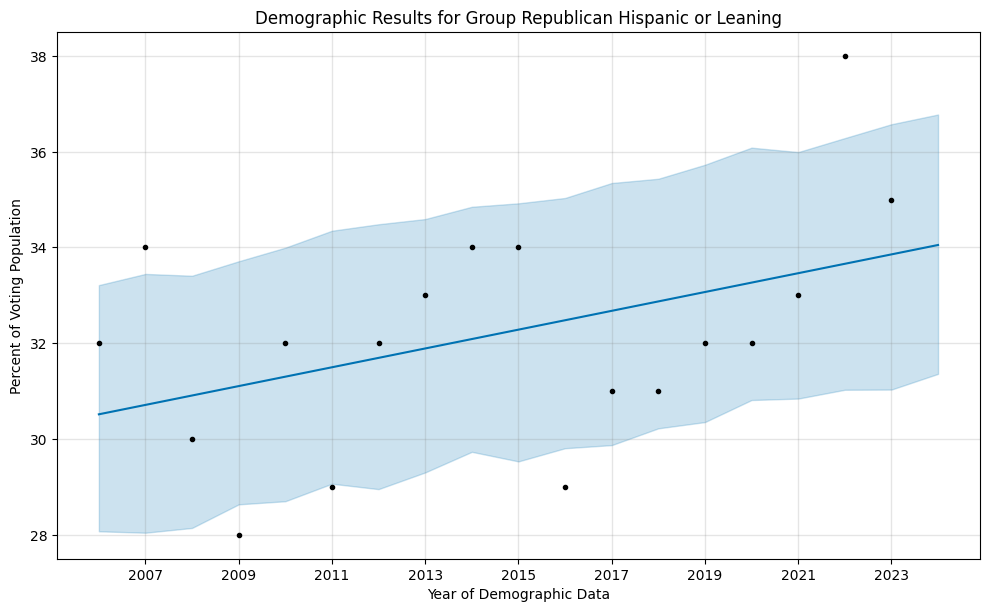

Rep Hispanic Most Likely  Rep Hispanic Best  Rep Hispanic Worst
ds                                                                         
2020-01-01                      33.3               36.1                30.8
2021-01-01                      33.5               36.0                30.8
2022-01-01                      33.7               36.3                31.0
2023-01-01                      33.9               36.6                31.0
2024-01-01                      34.1               36.8                31.4

<Axes: title={'center': 'Model: Hispanic Republicans or Leaning 1994 to 2024'}, xlabel='ds'>

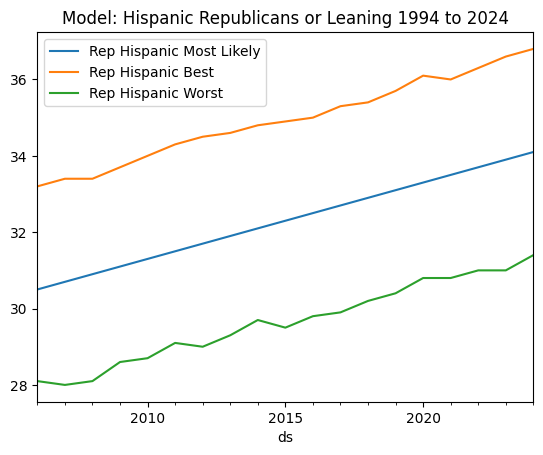

In [99]:
# Plot the Prophet predictions for the trends data: Hispanic Republicans or Leaning Republican
from matplotlib import pyplot as plt
fig = model_rep_hsp.plot(forecast_rep_hsp_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Republican Hispanic or Leaning')
plt.show()
#
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_rep_hsp_trends = forecast_rep_hsp_trends.set_index('ds')
#Rename yhat yhat_lower yhat_ upper
forecast_rep_hsp_trends = forecast_rep_hsp_trends.rename(
    columns={
        "yhat_upper": "Rep Hispanic Best",
        "yhat_lower": "Rep Hispanic Worst",
        "yhat": "Rep Hispanic Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_rep_hsp_trends_y_only = forecast_rep_hsp_trends[['Rep Hispanic Most Likely','Rep Hispanic Best','Rep Hispanic Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_rep_hsp_trends_y_only = forecast_rep_hsp_trends_y_only.round(decimals=1)
display(forecast_rep_hsp_trends_y_only.tail())
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_rep_hsp_trends_y_only[['Rep Hispanic Most Likely','Rep Hispanic Best','Rep Hispanic Worst']].plot(title='Model: Hispanic Republicans or Leaning 1994 to 2024')

In [100]:
# Generate Prophet Model for Next Year: Hispanic Democrats or Leaning Democrat
# Using the demographic DataFrame, reset the index so the date information is no longer the index
dem_hsp_prophet_df = dem_hsp_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
dem_hsp_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
dem_hsp_prophet_df = dem_hsp_prophet_df.dropna()
# View the DataFrame
# display(dem_hsp_prophet_df.tail())
# Call the Prophet function, store as an object
model_dem_hsp = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_dem_hsp.fit(dem_hsp_prophet_df)
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_dem_hsp_trends = model_dem_hsp.make_future_dataframe(periods=1, freq="A")
# View the last five rows of the future DataFrame
display(future_dem_hsp_trends.tail())
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_dem_hsp_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_dem_hsp_trends.tail())
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_dem_hsp_trends=model_dem_hsp.predict(future_dem_hsp_trends)
# Display the last five rows of the forecast_*_trends DataFrame
display(forecast_dem_hsp_trends.tail())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/_cm6qsy_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/j6v7sewx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52207', 'data', 'file=/tmp/tmpmebgaej8/_cm6qsy_.json', 'init=/tmp/tmpmebgaej8/j6v7sewx.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelvlr7rfcs/prophet_model-20240531005716.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:

ds
14 2020-01-01
15 2021-01-01
16 2022-01-01
17 2023-01-01
18 2023-12-31

ds
14 2020-01-01
15 2021-01-01
16 2022-01-01
17 2023-01-01
18 2024-01-01

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
14 2020-01-01  63.879266   60.895503   66.943303    63.879266    63.879266   
15 2021-01-01  63.611354   60.753951   66.781716    63.611354    63.611354   
16 2022-01-01  63.344173   60.318106   66.453465    63.344173    63.344173   
17 2023-01-01  63.076992   60.203871   66.258018    63.076992    63.076992   
18 2024-01-01  62.809812   59.642378   66.096396    62.809549    62.810107   

    additive_terms  additive_terms_lower  additive_terms_upper  \
14             0.0                   0.0                   0.0   
15             0.0                   0.0                   0.0   
16             0.0                   0.0                   0.0   
17             0.0                   0.0                   0.0   
18             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
14                   0.0                         0.0   
15                   0.0                         0.0   
16                   0.0                         0.0   
17                   0.0                         0.0   
18                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
14                         0.0  63.879266  
15                         0.0  63.611354  
16                         0.0  63.344173  
17                         0.0  63.076992  
18                         0.0  62.809812

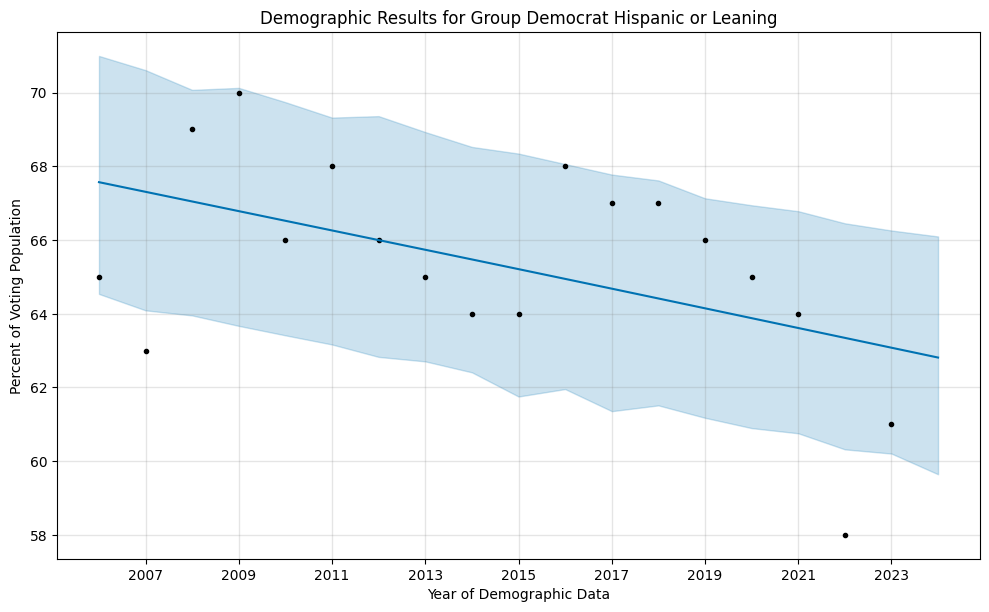

Dem Hispanic Most Likely  Dem Hispanic Best  Dem Hispanic Worst
ds                                                                         
2020-01-01                      63.9               66.9                60.9
2021-01-01                      63.6               66.8                60.8
2022-01-01                      63.3               66.5                60.3
2023-01-01                      63.1               66.3                60.2
2024-01-01                      62.8               66.1                59.6

<Axes: title={'center': 'Model: Hispanic Democrats or Leaning 1994 to 2024'}, xlabel='ds'>

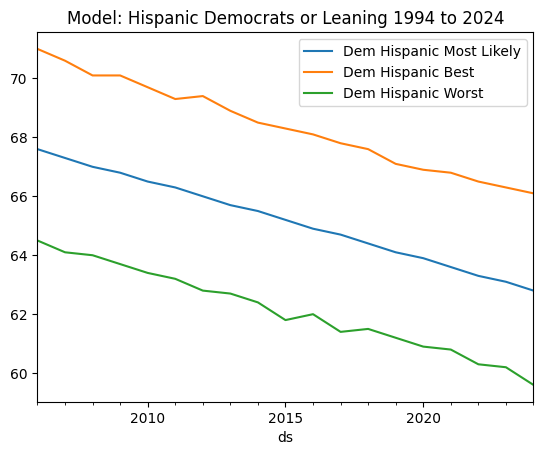

In [101]:
# Plot the Prophet predictions for the trends data: Hispanic Democrats or Leaning Democrats
from matplotlib import pyplot as plt
fig = model_dem_hsp.plot(forecast_dem_hsp_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Democrat Hispanic or Leaning')
plt.show()
#
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_dem_hsp_trends = forecast_dem_hsp_trends.set_index('ds')
#Rename yhat yhat_lower yhat_ upper
forecast_dem_hsp_trends = forecast_dem_hsp_trends.rename(
    columns={
        "yhat_upper": "Dem Hispanic Best",
        "yhat_lower": "Dem Hispanic Worst",
        "yhat": "Dem Hispanic Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_dem_hsp_trends_y_only = forecast_dem_hsp_trends[['Dem Hispanic Most Likely','Dem Hispanic Best','Dem Hispanic Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_dem_hsp_trends_y_only = forecast_dem_hsp_trends_y_only.round(decimals=1)
display(forecast_dem_hsp_trends_y_only.tail())
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_dem_hsp_trends_y_only[['Dem Hispanic Most Likely','Dem Hispanic Best','Dem Hispanic Worst']].plot(title='Model: Hispanic Democrats or Leaning 1994 to 2024')

In [102]:
# Generate Prophet Model for Next Year:  Black Republicans or Leaning Republican
# Using the demographic DataFrame, reset the index so the date information is no longer the index
rep_blk_prophet_df = rep_blk_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
rep_blk_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
rep_blk_prophet_df = rep_blk_prophet_df.dropna()
# View the DataFrame
# display(rep_blk_prophet_df.tail())
# Call the Prophet function, store as an object
model_rep_blk = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_rep_blk.fit(rep_blk_prophet_df)
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_rep_blk_trends = model_rep_blk.make_future_dataframe(periods=1, freq="A")
# View the last five rows of the future DataFrame
display(future_rep_blk_trends.tail())
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_rep_blk_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_rep_blk_trends.tail())
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_rep_blk_trends=model_rep_blk.predict(future_rep_blk_trends)
# Display the last five rows of the forecast_*_trends DataFrame
display(forecast_rep_blk_trends.tail())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/2nchd1we.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/g84rq444.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42593', 'data', 'file=/tmp/tmpmebgaej8/2nchd1we.json', 'init=/tmp/tmpmebgaej8/g84rq444.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_model4qvyvd6m/prophet_model-20240531005718.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  9.396934    7.414396   11.370397     9.396934     9.396934   
27 2021-01-01  9.329948    7.360868   11.305808     9.329948     9.329948   
28 2022-01-01  9.263145    7.293007   11.173668     9.263145     9.263145   
29 2023-01-01  9.196342    7.180519   11.079978     9.196342     9.196342   
30 2024-01-01  9.129539    7.137551   11.051560     9.129537     9.129540   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper      yhat  
26                         0.0  9.396934  
27                         0.0  9.329948  
28                         0.0  9.263145  
29                         0.0  9.196342  
30                         0.0  9.129539

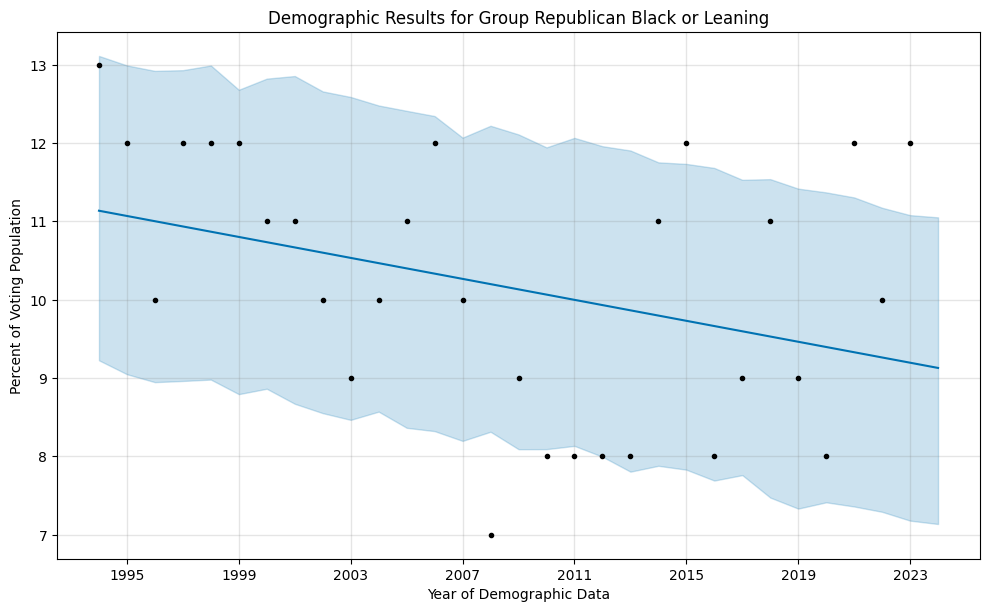

Rep Black Most Likely  Rep Black Best  Rep Black Worst
ds                                                                
2020-01-01                    9.4            11.4              7.4
2021-01-01                    9.3            11.3              7.4
2022-01-01                    9.3            11.2              7.3
2023-01-01                    9.2            11.1              7.2
2024-01-01                    9.1            11.1              7.1

<Axes: title={'center': 'Model: Black Republicans or Leaning 1994 to 2024'}, xlabel='ds'>

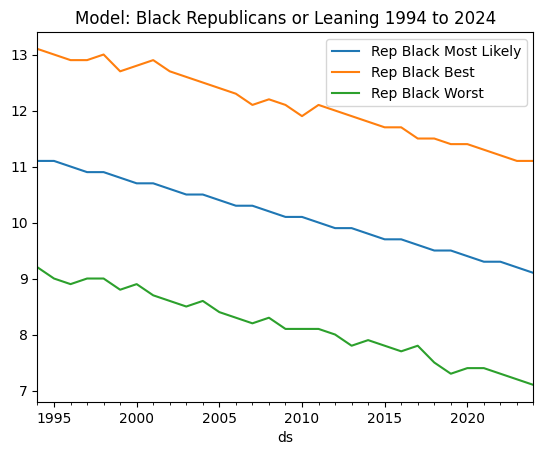

In [103]:
# Plot the Prophet predictions for the trends data: Black Republicans or Leaning Republican
from matplotlib import pyplot as plt
fig = model_rep_blk.plot(forecast_rep_blk_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Republican Black or Leaning')
plt.show()
#
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_rep_blk_trends = forecast_rep_blk_trends.set_index('ds')
#Rename yhat yhat_lower yhat_ upper
forecast_rep_blk_trends = forecast_rep_blk_trends.rename(
    columns={
        "yhat_upper": "Rep Black Best",
        "yhat_lower": "Rep Black Worst",
        "yhat": "Rep Black Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_rep_blk_trends_y_only = forecast_rep_blk_trends[['Rep Black Most Likely','Rep Black Best','Rep Black Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_rep_blk_trends_y_only = forecast_rep_blk_trends_y_only.round(decimals=1)
display(forecast_rep_blk_trends_y_only.tail())
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_rep_blk_trends_y_only[['Rep Black Most Likely','Rep Black Best','Rep Black Worst']].plot(title='Model: Black Republicans or Leaning 1994 to 2024')

In [104]:
# Generate Prophet Model for Next Year: Black Democrats or Leaning Democrat
# Using the demographic DataFrame, reset the index so the date information is no longer the index
dem_blk_prophet_df = dem_blk_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
dem_blk_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
dem_blk_prophet_df = dem_blk_prophet_df.dropna()
# View the DataFrame
# display(dem_blk_prophet_df.tail())
# Call the Prophet function, store as an object
model_dem_blk = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_dem_blk.fit(dem_blk_prophet_df)
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_dem_blk_trends = model_dem_blk.make_future_dataframe(periods=1, freq="A")
# View the last five rows of the future DataFrame
display(future_dem_blk_trends.tail())
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_dem_blk_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_dem_blk_trends.tail())
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_dem_blk_trends=model_dem_blk.predict(future_dem_blk_trends)
# Display the last five rows of the forecast_*_trends DataFrame
display(forecast_dem_blk_trends.tail())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/gmev2ezn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/7e82z0kx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37335', 'data', 'file=/tmp/tmpmebgaej8/gmev2ezn.json', 'init=/tmp/tmpmebgaej8/7e82z0kx.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelwtloksav/prophet_model-20240531005719.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2023-12-31

ds
26 2020-01-01
27 2021-01-01
28 2022-01-01
29 2023-01-01
30 2024-01-01

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
26 2020-01-01  86.214728   84.127736   88.149090    86.214728    86.214728   
27 2021-01-01  85.800443   83.904178   87.836426    85.800443    85.800443   
28 2022-01-01  85.387290   83.304697   87.386804    85.387290    85.387290   
29 2023-01-01  84.974138   83.051069   86.860525    84.974138    84.974138   
30 2024-01-01  84.560985   82.725472   86.449143    84.542874    84.584256   

    additive_terms  additive_terms_lower  additive_terms_upper  \
26             0.0                   0.0                   0.0   
27             0.0                   0.0                   0.0   
28             0.0                   0.0                   0.0   
29             0.0                   0.0                   0.0   
30             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
26                   0.0                         0.0   
27                   0.0                         0.0   
28                   0.0                         0.0   
29                   0.0                         0.0   
30                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
26                         0.0  86.214728  
27                         0.0  85.800443  
28                         0.0  85.387290  
29                         0.0  84.974138  
30                         0.0  84.560985

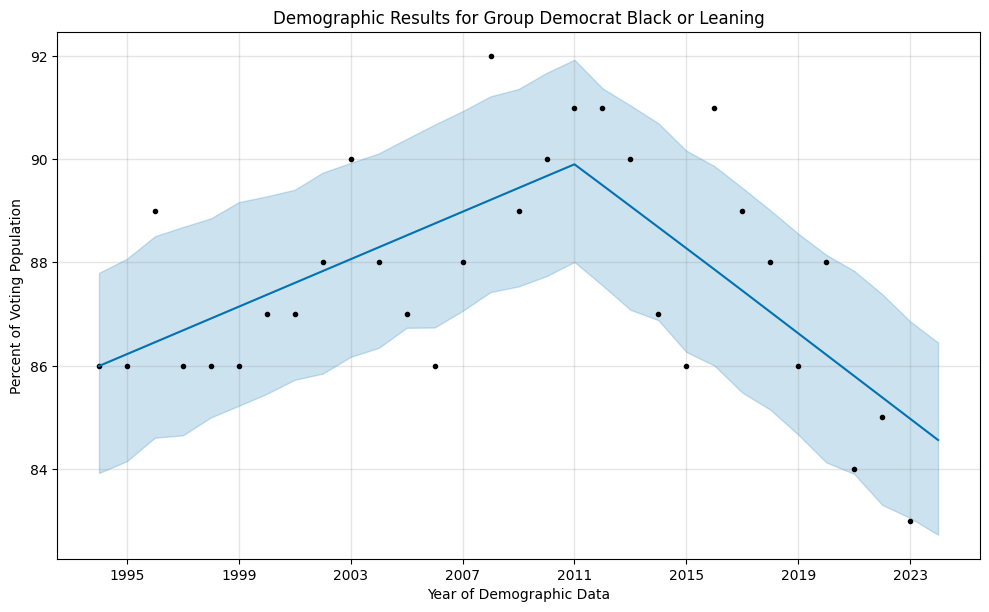

Dem Black Most Likely  Dem Black Best  Dem Black Worst
ds                                                                
2020-01-01                   86.2            88.1             84.1
2021-01-01                   85.8            87.8             83.9
2022-01-01                   85.4            87.4             83.3
2023-01-01                   85.0            86.9             83.1
2024-01-01                   84.6            86.4             82.7

<Axes: title={'center': 'Model: Black Democrats or Leaning 1994 to 2024'}, xlabel='ds'>

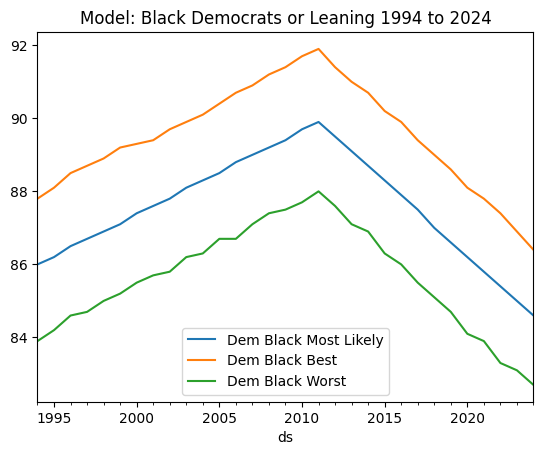

In [105]:
# Plot the Prophet predictions for the trends data: Black Democrats or Leaning Democrats
from matplotlib import pyplot as plt
fig = model_dem_blk.plot(forecast_dem_blk_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Democrat Black or Leaning')
plt.show()
#
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_dem_blk_trends = forecast_dem_blk_trends.set_index('ds')
#Rename yhat yhat_lower yhat_ upper
forecast_dem_blk_trends = forecast_dem_blk_trends.rename(
    columns={
        "yhat_upper": "Dem Black Best",
        "yhat_lower": "Dem Black Worst",
        "yhat": "Dem Black Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_dem_blk_trends_y_only = forecast_dem_blk_trends[['Dem Black Most Likely','Dem Black Best','Dem Black Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_dem_blk_trends_y_only = forecast_dem_blk_trends_y_only.round(decimals=1)
display(forecast_dem_blk_trends_y_only.tail())
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_dem_blk_trends_y_only[['Dem Black Most Likely','Dem Black Best','Dem Black Worst']].plot(title='Model: Black Democrats or Leaning 1994 to 2024')

In [106]:
# Generate Prophet Model for Next Year:  Asian Republicans or Leaning Republican
# Using the demographic DataFrame, reset the index so the date information is no longer the index
rep_asa_prophet_df = rep_asa_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
rep_asa_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
rep_asa_prophet_df = rep_asa_prophet_df.dropna()
# View the DataFrame
# display(rep_asa_prophet_df.tail())
# Call the Prophet function, store as an object
model_rep_asa = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_rep_asa.fit(rep_asa_prophet_df)
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_rep_asa_trends = model_rep_asa.make_future_dataframe(periods=1, freq="A")
# View the last five rows of the future DataFrame
display(future_rep_asa_trends.tail())
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_rep_asa_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_rep_asa_trends.tail())
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_rep_asa_trends=model_rep_asa.predict(future_rep_asa_trends)
# Display the last five rows of the forecast_*_trends DataFrame
display(forecast_rep_asa_trends.tail())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/_hgrp0iq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/zpywgk1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45266', 'data', 'file=/tmp/tmpmebgaej8/_hgrp0iq.json', 'init=/tmp/tmpmebgaej8/zpywgk1v.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelx95rkow8/prophet_model-20240531005720.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:

ds
22 2020-01-01
23 2021-01-01
24 2022-01-01
25 2023-01-01
26 2023-12-31

ds
22 2020-01-01
23 2021-01-01
24 2022-01-01
25 2023-01-01
26 2024-01-01

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
22 2020-01-01  30.365516   22.549086   37.536799    30.365516    30.365516   
23 2021-01-01  29.905162   22.455907   37.574845    29.905162    29.905162   
24 2022-01-01  29.446065   21.963780   36.831101    29.446065    29.446065   
25 2023-01-01  28.986968   21.817564   36.497063    28.986968    28.986968   
26 2024-01-01  28.527871   21.045435   35.981909    28.527871    28.527871   

    additive_terms  additive_terms_lower  additive_terms_upper  \
22             0.0                   0.0                   0.0   
23             0.0                   0.0                   0.0   
24             0.0                   0.0                   0.0   
25             0.0                   0.0                   0.0   
26             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
22                   0.0                         0.0   
23                   0.0                         0.0   
24                   0.0                         0.0   
25                   0.0                         0.0   
26                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
22                         0.0  30.365516  
23                         0.0  29.905162  
24                         0.0  29.446065  
25                         0.0  28.986968  
26                         0.0  28.527871

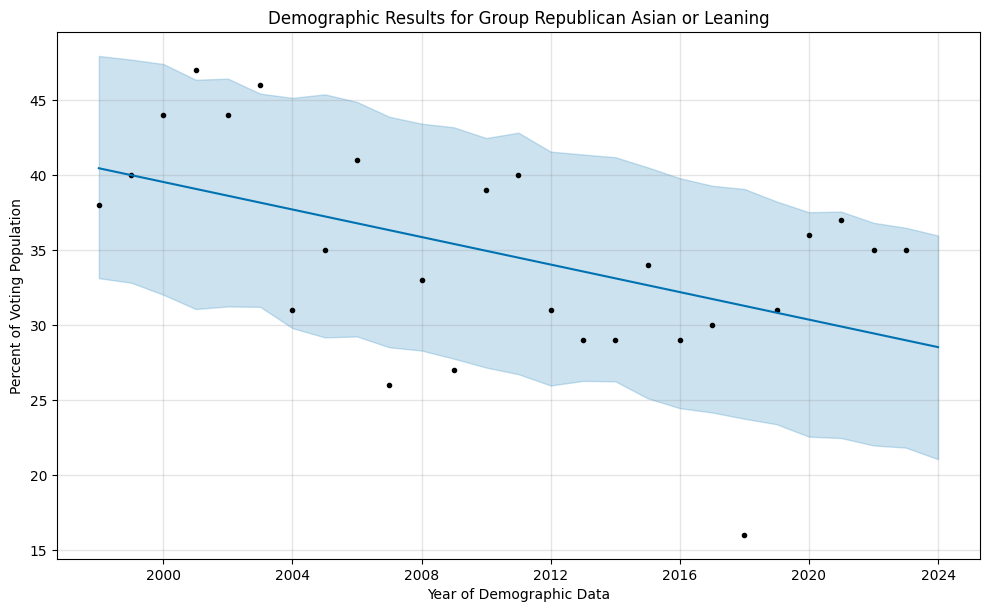

Rep Asian Most Likely  Rep Asian Best  Rep Asian Worst
ds                                                                
2020-01-01                   30.4            37.5             22.5
2021-01-01                   29.9            37.6             22.5
2022-01-01                   29.4            36.8             22.0
2023-01-01                   29.0            36.5             21.8
2024-01-01                   28.5            36.0             21.0

<Axes: title={'center': 'Model: Asian Republicans or Leaning 1994 to 2024'}, xlabel='ds'>

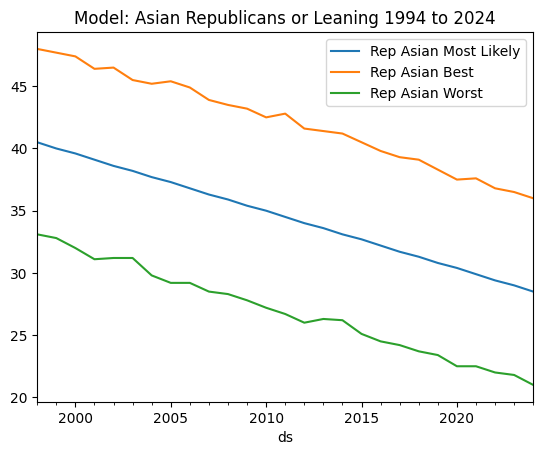

In [107]:
# Plot the Prophet predictions for the trends data: Asian Republicans or Leaning Republican
from matplotlib import pyplot as plt
fig = model_rep_asa.plot(forecast_rep_asa_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Republican Asian or Leaning')
plt.show()
#
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_rep_asa_trends = forecast_rep_asa_trends.set_index('ds')
#Rename yhat yhat_lower yhat_ upper
forecast_rep_asa_trends = forecast_rep_asa_trends.rename(
    columns={
        "yhat_upper": "Rep Asian Best",
        "yhat_lower": "Rep Asian Worst",
        "yhat": "Rep Asian Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_rep_asa_trends_y_only = forecast_rep_asa_trends[['Rep Asian Most Likely','Rep Asian Best','Rep Asian Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_rep_asa_trends_y_only = forecast_rep_asa_trends_y_only.round(decimals=1)
display(forecast_rep_asa_trends_y_only.tail())
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_rep_asa_trends_y_only[['Rep Asian Most Likely','Rep Asian Best','Rep Asian Worst']].plot(title='Model: Asian Republicans or Leaning 1994 to 2024')

In [108]:
# Generate Prophet Model for Next Year: Asian Democrats or Leaning Democrat
# Using the demographic DataFrame, reset the index so the date information is no longer the index
dem_asa_prophet_df = dem_asa_df.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
dem_asa_prophet_df.columns = ['ds', 'y']
# Drop any NaN values from the prophet_df DataFrame
dem_asa_prophet_df = dem_asa_prophet_df.dropna()
# View the DataFrame
# display(dem_asa_prophet_df.tail())
# Call the Prophet function, store as an object
model_dem_asa = Prophet(yearly_seasonality = False)
# Fit the time-series model.
model_dem_asa.fit(dem_asa_prophet_df)
# Create a future dataframe to hold predictions
# Make the prediction go out one year
future_dem_asa_trends = model_dem_asa.make_future_dataframe(periods=1, freq="A")
# View the last five rows of the future DataFrame
display(future_dem_asa_trends.tail())
# Replace the 2023-12-31 date in the forecast Dataframe with 2024-01-01
future_dem_asa_trends['ds'].replace('2023-12-31', '2024-01-01', inplace=True)
display(future_dem_asa_trends.tail())
# Make the predictions for the trend data using the future_*_trends DataFrame
forecast_dem_asa_trends=model_dem_asa.predict(future_dem_asa_trends)
# Display the last five rows of the forecast_*_trends DataFrame
display(forecast_dem_asa_trends.tail())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/osicboqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmebgaej8/v_uyi2mm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81804', 'data', 'file=/tmp/tmpmebgaej8/osicboqm.json', 'init=/tmp/tmpmebgaej8/v_uyi2mm.json', 'output', 'file=/tmp/tmpmebgaej8/prophet_modelm3o5qd_w/prophet_model-20240531005721.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:57:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:

ds
22 2020-01-01
23 2021-01-01
24 2022-01-01
25 2023-01-01
26 2023-12-31

ds
22 2020-01-01
23 2021-01-01
24 2022-01-01
25 2023-01-01
26 2024-01-01

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
22 2020-01-01  67.887643   59.741972   75.526194    67.887643    67.887643   
23 2021-01-01  68.435453   61.083848   76.663331    68.435453    68.435453   
24 2022-01-01  68.981767   61.223809   77.372544    68.981767    68.981767   
25 2023-01-01  69.528080   61.631947   77.618620    69.528080    69.528080   
26 2024-01-01  70.074393   62.111934   77.728209    70.074382    70.074404   

    additive_terms  additive_terms_lower  additive_terms_upper  \
22             0.0                   0.0                   0.0   
23             0.0                   0.0                   0.0   
24             0.0                   0.0                   0.0   
25             0.0                   0.0                   0.0   
26             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
22                   0.0                         0.0   
23                   0.0                         0.0   
24                   0.0                         0.0   
25                   0.0                         0.0   
26                   0.0                         0.0   

    multiplicative_terms_upper       yhat  
22                         0.0  67.887643  
23                         0.0  68.435453  
24                         0.0  68.981767  
25                         0.0  69.528080  
26                         0.0  70.074393

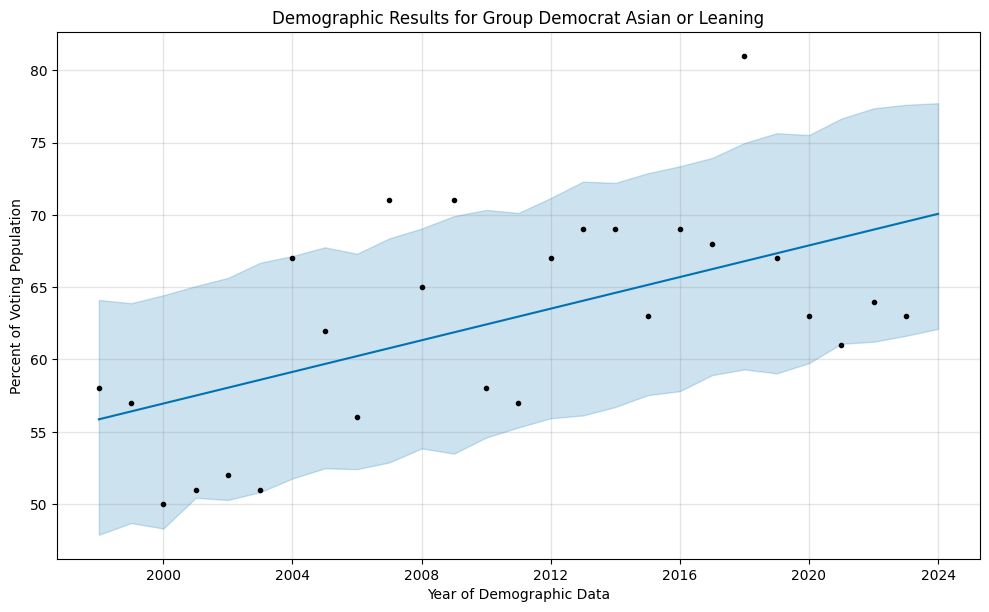

Dem Asian Most Likely  Dem Asian Best  Dem Asian Worst
ds                                                                
2020-01-01                   67.9            75.5             59.7
2021-01-01                   68.4            76.7             61.1
2022-01-01                   69.0            77.4             61.2
2023-01-01                   69.5            77.6             61.6
2024-01-01                   70.1            77.7             62.1

<Axes: title={'center': 'Model: Asian Democrats or Leaning 1994 to 2024'}, xlabel='ds'>

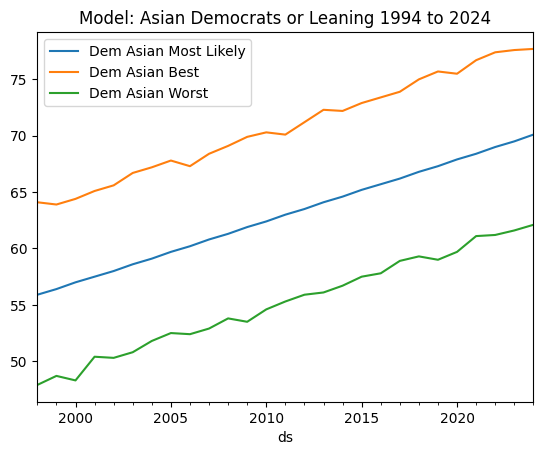

In [109]:
# Plot the Prophet predictions for the trends data: Asian Democrats or Leaning Democrats
from matplotlib import pyplot as plt
fig = model_dem_asa.plot(forecast_dem_asa_trends,xlabel='Year of Demographic Data', ylabel='Percent of Voting Population')
plt.title('Demographic Results for Group Democrat Asian or Leaning')
plt.show()
#
# Evaluate the Model
# Set the index in the forecast_*_trends DataFrame to the ds datetime column
forecast_dem_asa_trends = forecast_dem_asa_trends.set_index('ds')
#Rename yhat yhat_lower yhat_ upper
forecast_dem_asa_trends = forecast_dem_asa_trends.rename(
    columns={
        "yhat_upper": "Dem Asian Best",
        "yhat_lower": "Dem Asian Worst",
        "yhat": "Dem Asian Most Likely"
    }
)
# Create a new Dataframe with only yhat, yhat_lower and yhat_upper
forecast_dem_asa_trends_y_only = forecast_dem_asa_trends[['Dem Asian Most Likely','Dem Asian Best','Dem Asian Worst']]
# prompt: round columns to zero digits (Reference: AI assist debug)
forecast_dem_asa_trends_y_only = forecast_dem_asa_trends_y_only.round(decimals=1)
display(forecast_dem_asa_trends_y_only.tail())
# From the forecast_*_trends_y_only DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns
forecast_dem_asa_trends_y_only[['Dem Asian Most Likely','Dem Asian Best','Dem Asian Worst']].plot(title='Model: Asian Democrats or Leaning 1994 to 2024')

Rep White Most Likely  Rep Hispanic Most Likely  \
ds                                                            
2020-01-01                   55.4                      33.3   
2021-01-01                   55.5                      33.5   
2022-01-01                   55.6                      33.7   
2023-01-01                   55.7                      33.9   
2024-01-01                   55.8                      34.1   

            Rep Black Most Likely  Rep Asian Most Likely  
ds                                                        
2020-01-01                    9.4                   30.4  
2021-01-01                    9.3                   29.9  
2022-01-01                    9.3                   29.4  
2023-01-01                    9.2                   29.0  
2024-01-01                    9.1                   28.5

<Axes: title={'center': 'Demographic Prediction for Racial and Ethnic Republicans or Leaning Republican'}, xlabel='ds'>

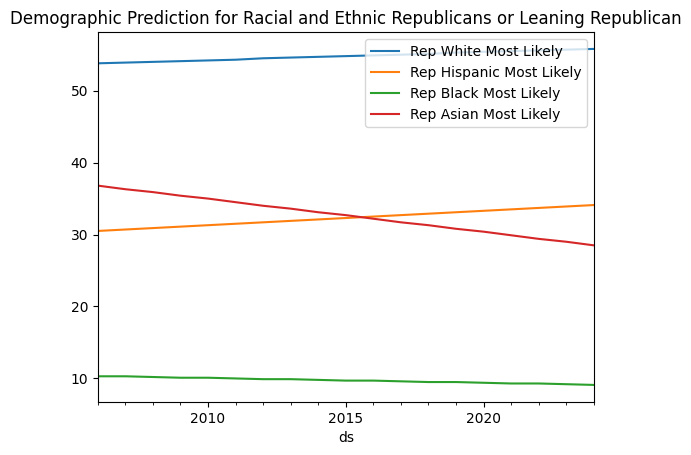

In [110]:
# Concat from Prophet Output:  Racial and Ethnical Republican Models
combined_model_racial_ethnic_republicans = pd.concat([forecast_rep_wht_trends_y_only,
                                              forecast_rep_hsp_trends_y_only,
                                              forecast_rep_blk_trends_y_only,
                                              forecast_rep_asa_trends_y_only],axis='columns',join='inner')
combined_model_racial_ethnic_republicans.rename(columns = {'ds':'Year'}, inplace = True)
combined_model_racial_ethnic_republicans_likely = combined_model_racial_ethnic_republicans[['Rep White Most Likely','Rep Hispanic Most Likely',
                                                                            'Rep Black Most Likely', 'Rep Asian Most Likely']]
display(combined_model_racial_ethnic_republicans_likely.tail())
# Plot Demographic
combined_model_racial_ethnic_republicans_likely.plot(title='Demographic Prediction for Racial and Ethnic Republicans or Leaning Republican')

Dem White Most Likely  Dem Hispanic Most Likely  \
ds                                                            
2020-01-01                   42.3                      63.9   
2021-01-01                   42.2                      63.6   
2022-01-01                   42.1                      63.3   
2023-01-01                   42.0                      63.1   
2024-01-01                   41.9                      62.8   

            Dem Black Most Likely  Dem Asian Most Likely  
ds                                                        
2020-01-01                   86.2                   67.9  
2021-01-01                   85.8                   68.4  
2022-01-01                   85.4                   69.0  
2023-01-01                   85.0                   69.5  
2024-01-01                   84.6                   70.1

<Axes: title={'center': 'Demographic Prediction for Racial and Ethnic Democrats or Leaning Democrat'}, xlabel='ds'>

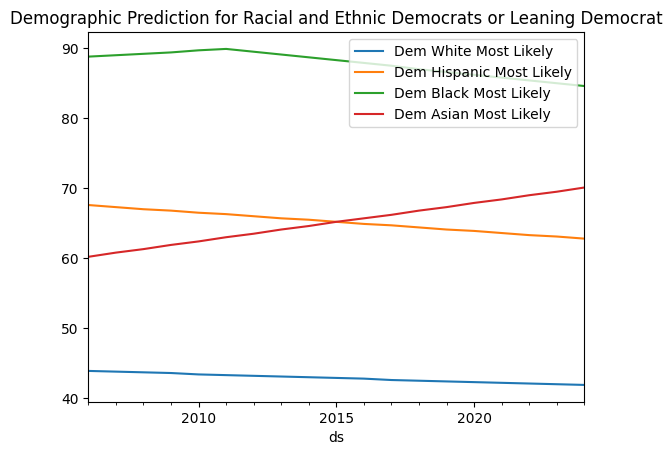

In [111]:
# Concat from Prophet Output:  Racial and Ethnical Democrat Models
combined_model_racial_ethnic_democrats = pd.concat([forecast_dem_wht_trends_y_only,
                                              forecast_dem_hsp_trends_y_only,
                                              forecast_dem_blk_trends_y_only,
                                              forecast_dem_asa_trends_y_only],axis='columns',join='inner')
combined_model_racial_ethnic_democrats.rename(columns = {'ds':'Year'}, inplace = True)
combined_model_racial_ethnic_democrats_likely = combined_model_racial_ethnic_democrats[['Dem White Most Likely','Dem Hispanic Most Likely',
                                                                            'Dem Black Most Likely', 'Dem Asian Most Likely']]
display(combined_model_racial_ethnic_democrats_likely.tail())
# Plot Demographic
combined_model_racial_ethnic_democrats_likely.plot(title='Demographic Prediction for Racial and Ethnic Democrats or Leaning Democrat')

###Compare Trends from 2010 to Predicted 2024 for Racial and Ethnic Groups

In [112]:
# Restore index for processing rows, upcoming calculations, and bar graph:  Republican Groups
combined_model_racial_ethnic_republicans_reset = combined_model_racial_ethnic_republicans_likely.reset_index()
display(combined_model_racial_ethnic_republicans_reset.tail())

ds  Rep White Most Likely  Rep Hispanic Most Likely  \
14 2020-01-01                   55.4                      33.3   
15 2021-01-01                   55.5                      33.5   
16 2022-01-01                   55.6                      33.7   
17 2023-01-01                   55.7                      33.9   
18 2024-01-01                   55.8                      34.1   

    Rep Black Most Likely  Rep Asian Most Likely  
14                    9.4                   30.4  
15                    9.3                   29.9  
16                    9.3                   29.4  
17                    9.2                   29.0  
18                    9.1                   28.5

In [113]:
# Restore default Index and rename "Year" column
combined_model_racial_ethnic_republicans_reset.rename(columns = {'ds':'Year'}, inplace = True)
display(combined_model_racial_ethnic_republicans_reset)

Year  Rep White Most Likely  Rep Hispanic Most Likely  \
0  2006-01-01                   53.8                      30.5   
1  2007-01-01                   53.9                      30.7   
2  2008-01-01                   54.0                      30.9   
3  2009-01-01                   54.1                      31.1   
4  2010-01-01                   54.2                      31.3   
5  2011-01-01                   54.3                      31.5   
6  2012-01-01                   54.5                      31.7   
7  2013-01-01                   54.6                      31.9   
8  2014-01-01                   54.7                      32.1   
9  2015-01-01                   54.8                      32.3   
10 2016-01-01                   54.9                      32.5   
11 2017-01-01                   55.0                      32.7   
12 2018-01-01                   55.1                      32.9   
13 2019-01-01                   55.3                      33.1   
14 2020-01-01                   55.4                      33.3   
15 2021-01-01                   55.5                      33.5   
16 2022-01-01                   55.6                      33.7   
17 2023-01-01                   55.7                      33.9   
18 2024-01-01                   55.8                      34.1   

    Rep Black Most Likely  Rep Asian Most Likely  
0                    10.3                   36.8  
1                    10.3                   36.3  
2                    10.2                   35.9  
3                    10.1                   35.4  
4                    10.1                   35.0  
5                    10.0                   34.5  
6                     9.9                   34.0  
7                     9.9                   33.6  
8                     9.8                   33.1  
9                     9.7                   32.7  
10                    9.7                   32.2  
11                    9.6                   31.7  
12                    9.5                   31.3  
13                    9.5                   30.8  
14                    9.4                   30.4  
15                    9.3                   29.9  
16                    9.3                   29.4  
17                    9.2                   29.0  
18                    9.1                   28.5

In [114]:
#Using dataframe combined_model_racial_ethnic_democrats_reset: create a new dataframe called change_in_value_*
#  with the solution for row 2009-01-01 subtracted from row 2024-01-01 for each column in the dataframe (Ref Colab Generate)
change_in_values_rep = combined_model_racial_ethnic_republicans_reset.iloc[18,1:] - combined_model_racial_ethnic_republicans_reset.iloc[3,1:]
display(change_in_values_rep)

Rep White Most Likely       1.7
Rep Hispanic Most Likely    3.0
Rep Black Most Likely      -1.0
Rep Asian Most Likely      -6.9
dtype: object

In [115]:
import pandas as pd
change_in_values_rep_df = pd.DataFrame(change_in_values_rep, columns=['change_in_values'], index=combined_model_racial_ethnic_republicans_reset.columns[1:])
change_in_values_rep_df

change_in_values
Rep White Most Likely                 1.7
Rep Hispanic Most Likely              3.0
Rep Black Most Likely                -1.0
Rep Asian Most Likely                -6.9

In [116]:
#Rename columns
change_in_values_rep_df.rename(columns = {'change_in_values':'Percent Change'}, inplace = True)
change_in_values_rep_df

Percent Change
Rep White Most Likely               1.7
Rep Hispanic Most Likely            3.0
Rep Black Most Likely              -1.0
Rep Asian Most Likely              -6.9

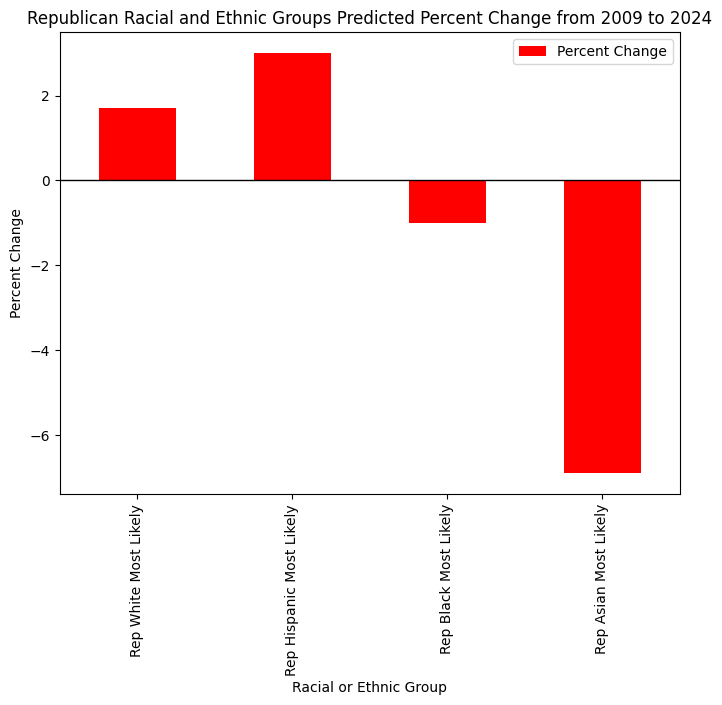

In [117]:
# Configure plot, figsize, title, and axis labels  (Reference: black y=0 axis line added with ChatGPT line pltx.axhline...=1)
racial_ethnic_rep_chart = change_in_values_rep_df.plot(kind="bar", facecolor="red", figsize=(8,6),
                                title="Republican Racial and Ethnic Groups Predicted Percent Change from 2009 to 2024",
                                xlabel="Racial or Ethnic Group",
                                ylabel="Percent Change")
plt.axhline(y=0, color='black', linewidth=1)
plt.show()

In [118]:
# Restore index for processing rows, upcoming calculations, and bar graph:  Democrat Groups
combined_model_racial_ethnic_democrats_reset = combined_model_racial_ethnic_democrats_likely.reset_index()
display(combined_model_racial_ethnic_democrats_reset.tail())

ds  Dem White Most Likely  Dem Hispanic Most Likely  \
14 2020-01-01                   42.3                      63.9   
15 2021-01-01                   42.2                      63.6   
16 2022-01-01                   42.1                      63.3   
17 2023-01-01                   42.0                      63.1   
18 2024-01-01                   41.9                      62.8   

    Dem Black Most Likely  Dem Asian Most Likely  
14                   86.2                   67.9  
15                   85.8                   68.4  
16                   85.4                   69.0  
17                   85.0                   69.5  
18                   84.6                   70.1

In [119]:
# Restore default Index and rename "Year" column
combined_model_racial_ethnic_democrats_reset.rename(columns = {'ds':'Year'}, inplace = True)
display(combined_model_racial_ethnic_democrats_reset)

Year  Dem White Most Likely  Dem Hispanic Most Likely  \
0  2006-01-01                   43.9                      67.6   
1  2007-01-01                   43.8                      67.3   
2  2008-01-01                   43.7                      67.0   
3  2009-01-01                   43.6                      66.8   
4  2010-01-01                   43.4                      66.5   
5  2011-01-01                   43.3                      66.3   
6  2012-01-01                   43.2                      66.0   
7  2013-01-01                   43.1                      65.7   
8  2014-01-01                   43.0                      65.5   
9  2015-01-01                   42.9                      65.2   
10 2016-01-01                   42.8                      64.9   
11 2017-01-01                   42.6                      64.7   
12 2018-01-01                   42.5                      64.4   
13 2019-01-01                   42.4                      64.1   
14 2020-01-01                   42.3                      63.9   
15 2021-01-01                   42.2                      63.6   
16 2022-01-01                   42.1                      63.3   
17 2023-01-01                   42.0                      63.1   
18 2024-01-01                   41.9                      62.8   

    Dem Black Most Likely  Dem Asian Most Likely  
0                    88.8                   60.2  
1                    89.0                   60.8  
2                    89.2                   61.3  
3                    89.4                   61.9  
4                    89.7                   62.4  
5                    89.9                   63.0  
6                    89.5                   63.5  
7                    89.1                   64.1  
8                    88.7                   64.6  
9                    88.3                   65.2  
10                   87.9                   65.7  
11                   87.5                   66.2  
12                   87.0                   66.8  
13                   86.6                   67.3  
14                   86.2                   67.9  
15                   85.8                   68.4  
16                   85.4                   69.0  
17                   85.0                   69.5  
18                   84.6                   70.1

In [120]:
#Using dataframe combined_model_racial_ethnic_democrats_reset: create a new dataframe called change_in_value_*
#  with the solution for row 2009-01-01 subtracted from row 2024-01-01 for each column in the dataframe (Ref Colab Generate)
change_in_values_dem = combined_model_racial_ethnic_democrats_reset.iloc[18,1:] - combined_model_racial_ethnic_democrats_reset.iloc[3,1:]
display(change_in_values_dem)

Dem White Most Likely      -1.7
Dem Hispanic Most Likely   -4.0
Dem Black Most Likely      -4.8
Dem Asian Most Likely       8.2
dtype: object

In [121]:
import pandas as pd
change_in_values_dem_df = pd.DataFrame(change_in_values_dem, columns=['change_in_values'], index=combined_model_racial_ethnic_democrats_reset.columns[1:])
change_in_values_dem_df

change_in_values
Dem White Most Likely                -1.7
Dem Hispanic Most Likely             -4.0
Dem Black Most Likely                -4.8
Dem Asian Most Likely                 8.2

In [122]:
#rename columns HERE
change_in_values_dem_df.rename(columns = {'change_in_values':'Percent Change'}, inplace = True)
change_in_values_dem_df

Percent Change
Dem White Most Likely              -1.7
Dem Hispanic Most Likely           -4.0
Dem Black Most Likely              -4.8
Dem Asian Most Likely               8.2

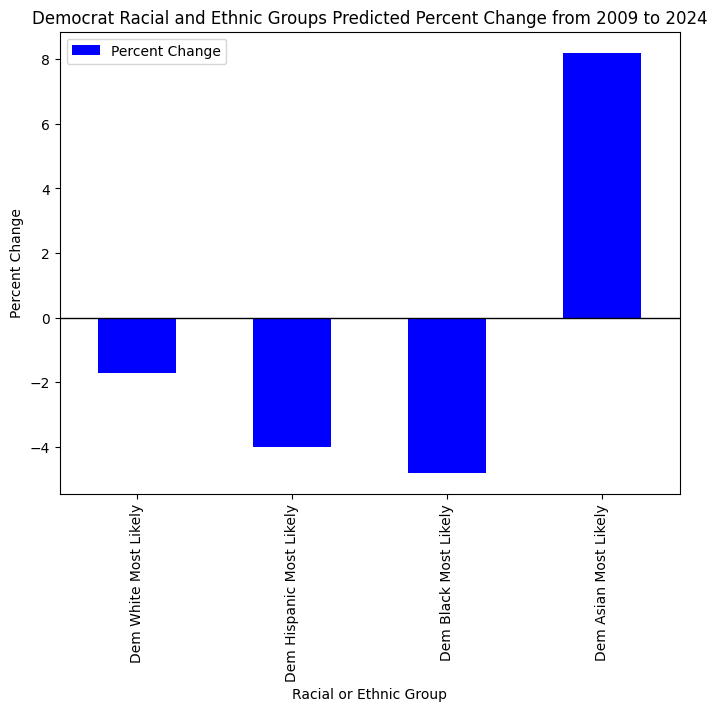

In [123]:
# Configure plot, figsize, title, and axis labels  (Reference: black y=0 axis line added with ChatGPT line pltx.axhline...=1)
racial_ethnic_dem_chart = change_in_values_dem_df.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="Democrat Racial and Ethnic Groups Predicted Percent Change from 2009 to 2024",
                                xlabel="Racial or Ethnic Group",
                                ylabel="Percent Change")
plt.axhline(y=0, color='black', linewidth=1)
plt.show()

Analysis & Conclusions: Polling Trends for Demographics:  Racial and Ethnic Groups


### Analysis & Conclusions:  Polling Trends For Racial and Ethnic Groups
Through eight total demographic groups (4 racial/ethnic groups and Republican or Democrat), most groups were very stable since 2010.

For both Democrat and Republican voters, the largest change was with those identifying as "Asian", with approximately 8% of Asian votes moving from Republican to Democrat candidtes or leaning Democrat.  

The Asian demographic was the only demographic showing gains for the Democrat.

One group, Black voters, showed a decline in both parties.  This indicates those voters possibly voting independent or not voting at all.

# Final Conclusions

Numerous Democrat predictions are trending "negative".  Democrat voters are trending towards declining in both the general vote, and in demographic segments of women voters, Black voters, white voters, and Hispanic voters.

Republican predictions are trending "positive", with the one notable exception of Asian voters, and slightly trending negative with Black voters.  However, Democrats are also trending negative for Black voters.

In a close election compared to 2020, the negative trend for Democrats may be enough to impact the electorial college towards a Republican win.  Not because more voters will vote Republican, but because less voters will vote Democrat.